# Problem Statement
Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

**Dataset**:

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone



## Cursory Analysis

The problem as stated could be useful for a business, however there are a few dangers that I feel I should point out.

First, Twitter is a poor representative of actual public sentiment. Observe US usage statistics:

<a href="https://www.statista.com/statistics/265647/share-of-us-internet-users-who-use-twitter-by-age-group/" rel="nofollow"><img src="https://www.statista.com/graphic/1/265647/share-of-us-internet-users-who-use-twitter-by-age-group.jpg" alt="Statistic: Percentage of U.S. adults who use Twitter as of February 2021, by age group | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br />Find more statistics at  <a href="https://www.statista.com" rel="nofollow">Statista</a>

This distribution is clearly wildly different from the actual demographic age distribution of the USA. It is a lot younger, and while Millenials do tend to travel a great deal, Gen X and boomers also travel a great deal. In fact, Generation X accounts for [one out of three leisure travelers](https://www.condorferries.co.uk/travel-statistics-by-age-group)

Furthermore, Twitter is much more left-wing than the general population. According to [Pew Research](https://www.pewresearch.org/internet/2019/04/24/sizing-up-twitter-users/), in 2019 36% of Twitter users identify as Democrat compared to the population's 30%. The reverse is true for Republicans, with 21% of adult Twitter users identifying as Republican versus 26% of the actual population.

The differences don't stop there, either.

Most Twitter users are silent. Again according to Pew Research, 10% of Twitter users are responsible for 80% of all tweets.

Any analysis of tweets, even if our unit of analysis is reduced to the user, runs into serious problems. The core question of any survey research is this: are the findings representative of the population? In the case of Twitter, this is a resounding **NO**. Not only are the vocal 10% *extremely unlikely* to represent the remaining 90% of Twitter, we can confidently conclude it does not at all represent the population at large. 

Thus, any analysis of Twitter needs to be used as a supplement for actual surveys with proper methodologies, or balanced with machine learning analyses of other communitieis, such as Gab (for conservatives) or Facebook (for older populations). Otherwise, generalization from Twitter sentiment to customer sentiment in general would inevitably lead to extreme and costly errors.

In [ ]:

# install and import necessary libraries.

!pip install contractions
!pip install autocorrect
!pip install shap

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.
from autocorrect import Speller                         # Imports a spelling correction tool

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt

# Model Building
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import shap
from wordcloud import WordCloud
import wordcloud

# Keep our memory clean
import gc

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#I want our arrays to be un-truncated.
np.set_printoptions(threshold=np.inf)

In [ ]:
#I'm using colab so I have to connect to my Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the data from MyDrive
data = pd.read_csv('/content/drive/MyDrive/UT_Course_project_notebooks/Tweets.csv')

In [ ]:
# Copying so we don't accidentally ruin our original files
df = data.copy()

In [ ]:
# We run into index errors below if I don't reset the index
df = df.reset_index()

In [ ]:
# Find the shape: number of rows then number of columns
df.shape

(14640, 16)

We have 14,640 tweets and 16 features describing them.


In [ ]:
# Info to get a condensed summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         14640 non-null  int64  
 1   tweet_id                      14640 non-null  int64  
 2   airline_sentiment             14640 non-null  object 
 3   airline_sentiment_confidence  14640 non-null  float64
 4   negativereason                9178 non-null   object 
 5   negativereason_confidence     10522 non-null  float64
 6   airline                       14640 non-null  object 
 7   airline_sentiment_gold        40 non-null     object 
 8   name                          14640 non-null  object 
 9   negativereason_gold           32 non-null     object 
 10  retweet_count                 14640 non-null  int64  
 11  text                          14640 non-null  object 
 12  tweet_coord                   1019 non-null   object 
 13  t

In [ ]:
# Let's get some basic summary statistics for the columns
df.describe().round(3)

index      tweet_id  ...  negativereason_confidence  retweet_count
count  14640.000  1.464000e+04  ...                  10522.000      14640.000
mean    7319.500  5.692184e+17  ...                      0.638          0.083
std     4226.348  7.791112e+14  ...                      0.330          0.746
min        0.000  5.675883e+17  ...                      0.000          0.000
25%     3659.750  5.685592e+17  ...                      0.361          0.000
50%     7319.500  5.694779e+17  ...                      0.671          0.000
75%    10979.250  5.698905e+17  ...                      1.000          0.000
max    14639.000  5.703106e+17  ...                      1.000         44.000

[8 rows x 5 columns]

Immediately some things come to mind:

* Index should not be its own column
* There are a lot of null values across a wide variety of columns
* Some column names are not descriptive of their content. What is 'name'? What is airline_sentiment_gold?

We have to dive deeper to find out more about this data.

# Exploratory Data Analysis

The main thing we're looking at only actually requires five of the columns:

* The tweet itself
* The label (airline sentiment)
* The negative reasons
* The airlines in question
* The usernames

All the other columns are useful only for post-prediction analysis and discussion. That's still important for business insights, though, so I'll check these features out and see how many we want to keep around.

## Data Overall

We'll have to look at null values, as many columns are full of them.

Otherwise, a few columns perhaps should be dropped outright. tweet_id is likely not helpful. Name may or may not be helpful, I want to see it in context.

In [ ]:
# A bit of context for each of the columns
df.head()

index            tweet_id  ... tweet_location               user_timezone
0      0  570306133677760513  ...            NaN  Eastern Time (US & Canada)
1      1  570301130888122368  ...            NaN  Pacific Time (US & Canada)
2      2  570301083672813571  ...      Lets Play  Central Time (US & Canada)
3      3  570301031407624196  ...            NaN  Pacific Time (US & Canada)
4      4  570300817074462722  ...            NaN  Pacific Time (US & Canada)

[5 rows x 16 columns]

Name is the person making the tweet. This could be very important. 

The project goal is to gauge sentiment of customers, not of number of tweets. To do that, we'll have to judge based on unique users, not unique tweets.

However, the number of tweets a person has with a certain sentiment could be used to gauge the *degree* of that emotion. A customer who posts a lot, and all of their tweets are negative, is likely to be more angry than the customer who tweets a lot of neutral but only one angry tweet.

Before we get into that though, let's do some basic cleanup.

In [ ]:
# We need to check for duplicates
df.duplicated().sum()

0

In [ ]:
# Let's look at them
df[(df.duplicated() == True)]

Empty DataFrame
Columns: [index, tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone]
Index: []

In [ ]:
# The above only displayed one of the pair. Let's look at one.
df[df.tweet_id == 570308309682675712]

index            tweet_id  ... tweet_location  user_timezone
11879  11879  570308309682675712  ...            NaN          Quito
12040  12040  570308309682675712  ...            NaN          Quito

[2 rows x 16 columns]

In [ ]:
# Everything is the same except the index. One of each should be dropped.
df = df.drop_duplicates(keep='first')

In [ ]:
# If the above worked, only one should remain.
df[df.tweet_id == 570308309682675712]

index            tweet_id  ... tweet_location  user_timezone
11879  11879  570308309682675712  ...            NaN          Quito
12040  12040  570308309682675712  ...            NaN          Quito

[2 rows x 16 columns]

In [ ]:
# Now that duplicates are gone, tweet_id has lost its purpose and can be dropped.
df.drop('tweet_id', axis=1, inplace=True)

Now I want to see if our data is bias towards one airline or another.

In [ ]:
# Getting counts for each unique value in the airline column
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Yes, the data is extremely bias towards certain airlines. Airlines are not our target variable, so to speak, but it's important to know. Let's visualize it.

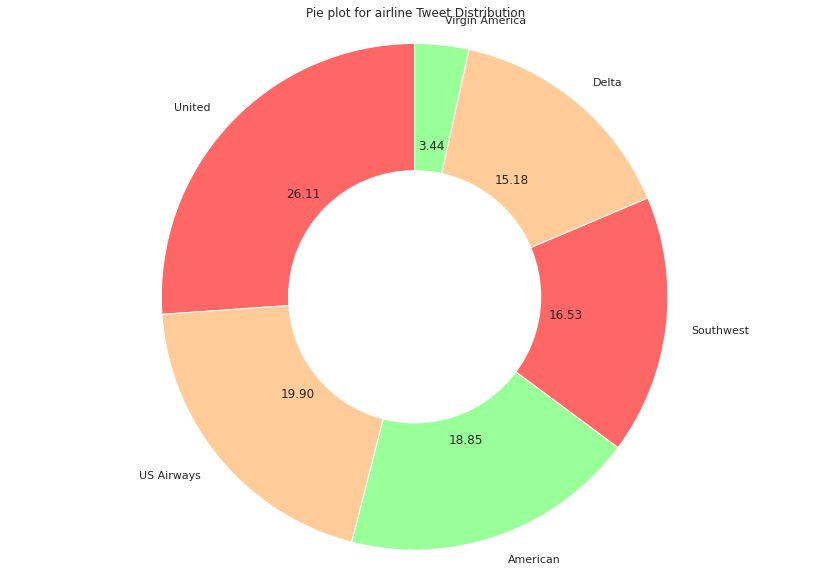

In [ ]:
  # Making a pieplot for how the airline tweets are distributed
  colors = ['#ff6666', '#ffcc99', '#99ff99']

  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plot = plt.pie(df['airline'].value_counts(), labels=df['airline'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
  centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.title(f'Pie plot for airline Tweet Distribution')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

Most of the airlines have between 15 and 20 percent of the tweets, with the two exceptions being Virgin America and United. United has a lot more tweets about it than the others at 26.1% of all tweets, and Virgin America has a tiny minority of only 3.4%.

This will make some comparisons and generalizations difficult later, but it is what it is.

### Missing Values

We also need to examine missing values. There are a lot of anomalies here.

In [ ]:
# Get null counts, rather than non-null counts
df.isnull().sum(axis=0)   

index                               0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

That's a lot of missing values. In fact, it seems like three of the columns are almost entirely missing values.

Let's visualize it.

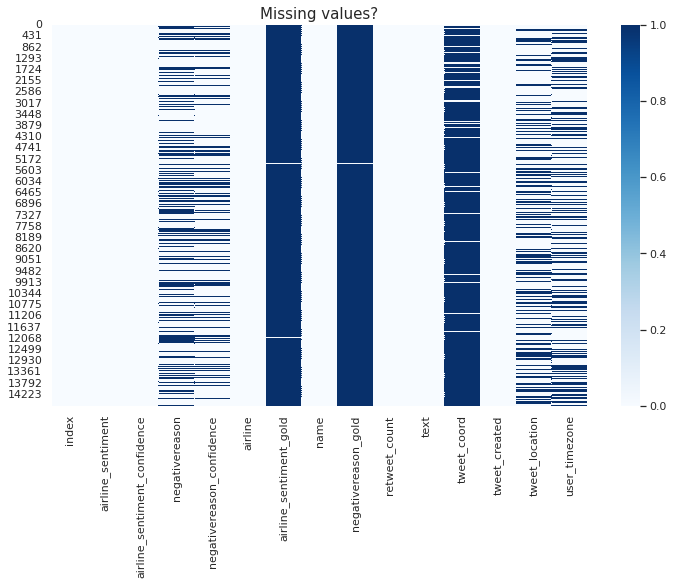

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.

### Unique Values

It could be useful for us to look at the number of unique values for each of the columns.

In [ ]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [ ]:
unidf = return_unique_values(df)
print(unidf)

                        Features  Uniques
0                          index    14640
1              airline_sentiment        3
2   airline_sentiment_confidence     1023
3                 negativereason       10
4      negativereason_confidence     1410
5                        airline        6
6         airline_sentiment_gold        3
7                           name     7701
8            negativereason_gold       13
9                  retweet_count       18
10                          text    14427
11                   tweet_coord      832
12                 tweet_created    14247
13                tweet_location     3081
14                 user_timezone       85


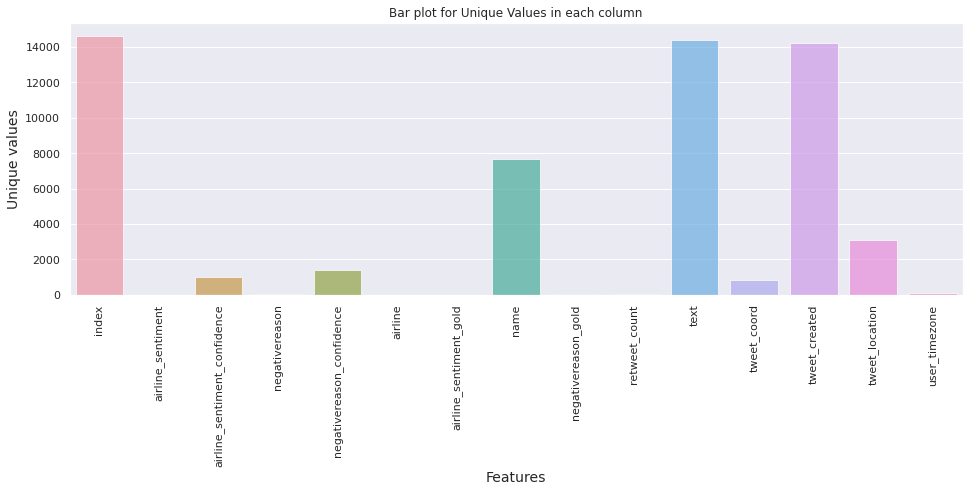

In [ ]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Interestingly, name is only about half of text, which means not very many users made only a single tweet. I'll be interested to see what happens when we look at users only rather than tweets.

## Location Features

Three of the columns seem to be measuring the same thing: tweet_coord, tweet_location, and user_timezone.

All of these are location data about the user. However, all of these columns are also plagued with missing values.

These missing values are not 1:1 though, and thus it may be possible to preserve location data by combining all three columns into a single location feature. This would reduce the number of missing values while retaining location data.

To see if this is plausible, I'm going to look closer at these features, starting with tweet_coord.

In [ ]:
# Pulling up a sample of 10 tweet_coord that aren't null
df[df['tweet_coord'].isnull() != True].sample(10, random_state=42)

index  ...               user_timezone
6689   6689  ...  Eastern Time (US & Canada)
5636   5636  ...                         NaN
5432   5432  ...                   Amsterdam
303     303  ...  Eastern Time (US & Canada)
8053   8053  ...  Central Time (US & Canada)
7627   7627  ...  Eastern Time (US & Canada)
5485   5485  ...      Atlantic Time (Canada)
9920   9920  ...  Eastern Time (US & Canada)
796     796  ...  Pacific Time (US & Canada)
6237   6237  ...  Central Time (US & Canada)

[10 rows x 15 columns]

Ah, so tweet_coord is literally a geographic coordinate.

However, they don't seem to line up with the tweet locations.

For example, index 13155 above has a coordinate of 33.43417698, -111.99680158, but a location of Memphis. Unfortunately, those coordinates land the tweet squarely in Phoenix, Arizona.

The coordinates of index 6543 do land them on the East Coast of the USA, but this is not in alignment with their timezone: The Canadian Atlantic Timezone is one hour off from the US East timezone.

For 7974, Leighton Buzzard is actually in the United Kingdom. Meanwhile, the coordination of the tweet puts them in New York City, USA.

0.0, 0.0 is in the middle of the ocean. I don't think fish use Twitter. It's definitely not in NYC.

This is just in a sample of 10. I'm going to sample another 10 and look at the consistency.


In [ ]:
df[df['tweet_coord'].isnull() != True].sample(10, random_state=1)

index  ...               user_timezone
3109    3109  ...                         NaN
1626    1626  ...                         NaN
11918  11918  ...  Pacific Time (US & Canada)
2062    2062  ...  Pacific Time (US & Canada)
6082    6082  ...  Pacific Time (US & Canada)
3802    3802  ...                       Quito
7495    7495  ...  Eastern Time (US & Canada)
976      976  ...                      London
1063    1063  ...  Eastern Time (US & Canada)
585      585  ...                      London

[10 rows x 15 columns]

37.61907, -122.38607 is in San Francisco, not San Diego.
33.42067535, -111.93155126 is indeed in Tempe, AZ, but Portland is also listed? How is a tweet tweeted at two locations at the same time?

Once again, 0.0, 0.0 is in the middle of the ocean.

How is "Nashville via minnesota" a location?

Or "All Over The World"?

Although I wanted to fold these three features into one another, instead I discovered that this data is too dirty to use. It's completely full of contradictions, casting doubt on all of it. On top of that, these columns are absolutely full of null values.

I don't think these features are salvagable. I originally wanted to fold them into each other to preserve some sort of location information, but in reality they provide no useful information. I can't say something like "these kinds of tweets come from this place". 

I'm dropping them.


In [ ]:
df.drop('tweet_coord', axis=1, inplace=True)
df.drop('tweet_location', axis=1, inplace=True)
df.drop('user_timezone', axis=1, inplace=True)

## Users

Unfortunately, a simple analysis of the tweets is insufficient. We have to do an analysis *by user*, otherwise we weigh vocal people even more than the initial Twitter bias of 10% making up 80% of all tweets.

It would be incorrect to conclude an airline is the most hated on Twitter if they just made one person really mad and that person tweeted insults 5000 times. What if everyone else was pleased?

So, we need to make a new label: negative or positive customer. To do this, we must sort the tweets by user and then judge whether the user is overall happy or unhappy with the airline.

To prove my point, let's first look at how many users are tweeting:

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about Social Dielamma'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

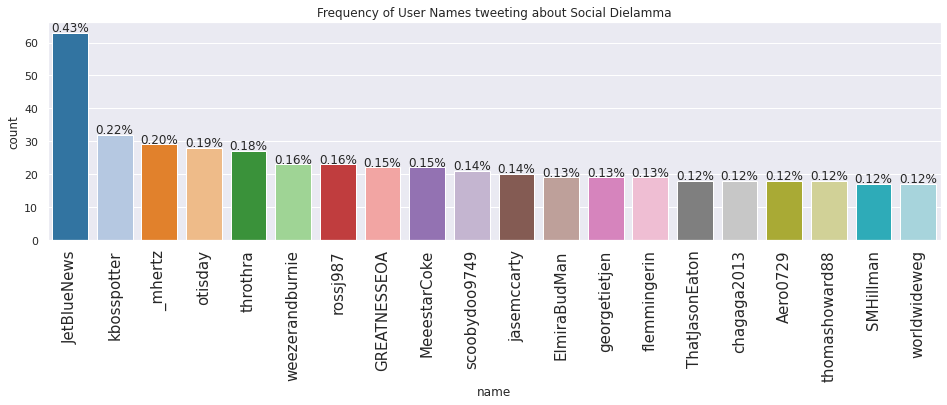

In [ ]:
#Visualize the top 20 users by number of tweets
labeled_barplot(df, 'name', 'User Names','tab20')

JetBlueNews?! Did we include an airline's tweets about themselves?

In [ ]:
df[df['name']=="JetBlueNews"]

index  ...              tweet_created
296     296  ...  2015-02-20 10:05:06 -0800
7860   7860  ...  2015-02-21 07:36:06 -0800
7867   7867  ...  2015-02-21 07:05:06 -0800
7872   7872  ...  2015-02-21 06:36:06 -0800
7884   7884  ...  2015-02-21 04:36:05 -0800
...     ...  ...                        ...
8915   8915  ...  2015-02-17 10:36:04 -0800
8921   8921  ...  2015-02-17 10:05:06 -0800
8954   8954  ...  2015-02-17 08:36:06 -0800
8957   8957  ...  2015-02-17 08:05:06 -0800
8965   8965  ...  2015-02-16 23:36:05 -0800

[63 rows x 12 columns]

In [ ]:
# Are they ever negative?
df[(df['name']=="JetBlueNews") & (df['airline_sentiment'] == 'negative')]

index  ...              tweet_created
8431   8431  ...  2015-02-19 03:05:05 -0800

[1 rows x 12 columns]

In [ ]:
# Let's see the full text
df['text'][8431]

"@JetBlue's CEO battles to appease passengers and Wall Street - @TheVDT http://t.co/h6cE3mWCqj"

The one negative tweet by this user is actually mislabeled: That is clearly a neutral or positive tweet.

I went onto Twitter to see if this account is an official account or just a very excited fan, and unfortunately the account has since been suspended.

However, based on archived tweets mentioning JetBlueNews, this does seem to be an official Twitter account of JetBlue.

These tweets should not be in here. We don't care if JetBlue really likes themselves. I'm dropping all of these.

In [ ]:
# JetBlueNews has no business being in this dataset. Drop.
for i in df[df['name']=="JetBlueNews"].index:
  df.drop(i, axis=0, inplace=True)

Now I'm paranoid, I want to ensure there are no other airlines in the user list.

In [ ]:
virgin_names = []
united_names = []
southwest_names = []
jetblue_names = []
usairways_names = []
american_names = []
other_airlines = []

for i in [item.lower() for item in df['name'].unique()]:
  if i.__contains__('virgin'):
    virgin_names.append(i)
  if i.__contains__('united'):
    united_names.append(i)
  if i.__contains__('southwest'):
    southwest_names.append(i)
  if i.__contains__('jetblue'):
    jetblue_names.append(i)
  if i.__contains__('airway'):
    usairways_names.append(i)
  if i.__contains__('american'):
    american_names.append(i)
  if i.__contains__('airline'):
    other_airlines.append(i) 

Now we manually check if our filters caught any airline names.

In [ ]:
virgin_names

['virginiarmz']

In [ ]:
united_names

['unitedappeals']

In [ ]:
southwest_names

['southwestair']

Bam, got one. Let's see it.

In [ ]:
df[df['name']=="SouthwestAir"]

index  ...              tweet_created
5270   5270  ...  2015-02-21 11:55:19 -0800

[1 rows x 12 columns]

In [ ]:
# Let's see the full text
df['text'][5270]

"@SouthwestAir y'all are fast we already have our 5 winners! Congrats!!"

This tweet should not be in our database. I'll check the other tweet names first to see if we can find any others, then we'll drop them all at once.

In [ ]:
jetblue_names

['jetblue']

In [ ]:
usairways_names

[]

In [ ]:
american_names

['americannarad', 'americanbudoma']

In [ ]:
other_airlines

['airlinefuel', 'airlineadviser', 'airliners2']

The other names that got caught by my filters seem to be authentic usernames unrelated to the airlines themselves.

I'm pretty confident I got all of the airlines out of the users. Now we can do a proper analysis.

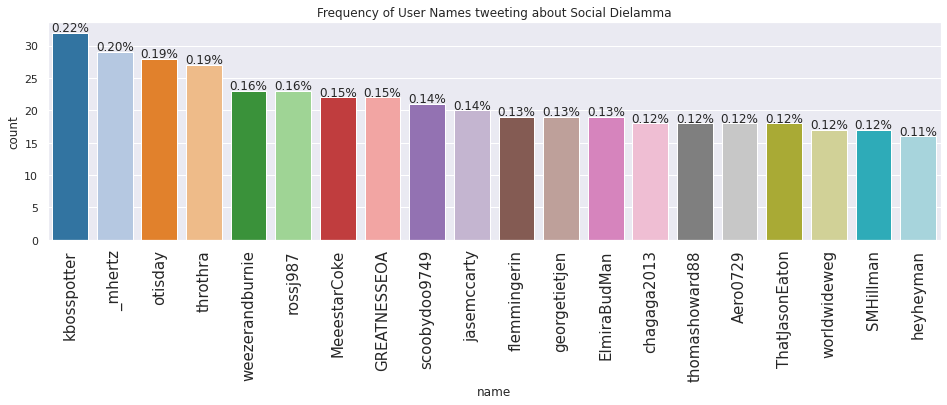

In [ ]:
#Visualize the top 20 users by number of tweets
labeled_barplot(df, 'name', 'User Names','tab20')

The most tweets by any one user is just over 30, accounting for a mere 0.22% of all the tweets. Let's dive into this further and separate the tweets by sentiment. The ultimate goal is to label each user as negative, positive, or neutral.

In [ ]:
# Creating tweet frequency to measure which users tweeted what
tweet_frequency = pd.DataFrame(columns=['Username','Tweet_count', 'Positive_tweets','Negative_tweets',"Neutral_tweets"])


In [ ]:
# The index will be the username. This will be important when we do iterations later.
tweet_frequency['Username'] = df.groupby(['name']).text.count().index    # This gives us a list of all unique usernames in the data.
tweet_frequency['Tweet_count']= list(df.groupby(['name']).text.count())  # This adds the total number of tweets each user made
tweet_frequency['Positive_tweets'] = 0                                   # We start with 0, as we classify each tweet we'll increase it.
tweet_frequency['Negative_tweets'] = 0
tweet_frequency['Neutral_tweets'] = 0
tweet_frequency = tweet_frequency.set_index('Username')
# Let's take a look at our new dataframe
tweet_frequency

Tweet_count  Positive_tweets  Negative_tweets  Neutral_tweets
Username                                                                    
0504Traveller            5                0                0               0
09202010                 2                0                0               0
0veranalyser             2                0                0               0
0xjared                  1                0                0               0
10Eshaa                  1                0                0               0
...                    ...              ...              ...             ...
zombiesausage            1                0                0               0
zozo24dad                1                0                0               0
zsalim03                 2                0                0               0
zslick99                 1                0                0               0
zupshawrl                1                0                0               0

[7700 rows x 4 columns]

In [ ]:
tweet_frequency.shape

(7700, 4)

We have 7700 unique usernames in our new dataframe.

Now what we'll do is iterate through the original df. Anytime a username has a tweet sentiment label, we'll increase the number of its respective column in tweet frequency.

In [ ]:
# Iterating through the entire df and altering the user df by counting each user's positivity/negativity/neutrality
for i, x in df.iterrows():
  for name in df.groupby(['name']).text.count().index:
    if x.at['name'] == name:
      if df.at[i, 'airline_sentiment'] == 'positive':
        tweet_frequency.loc[name]['Positive_tweets'] +=1
      if df.at[i, 'airline_sentiment'] == 'neutral':
        tweet_frequency.loc[name]['Neutral_tweets'] +=1
      if df.at[i, 'airline_sentiment'] == 'negative':
        tweet_frequency.loc[name]['Negative_tweets'] +=1


In [ ]:
# tweet_frequency.to_csv('tweet_sentiment_by_user.csv')
# from google.colab import files
# files.download('tweet_sentiment_by_user.csv')
# tweet_frequency = pd.read_csv('/content/drive/MyDrive/UT_Course_project_notebooks/tweet_sentiment_by_user.csv')

Ok, now we have a dataframe with all the tweets sorted by user. Let's look at some of the data we dredged up.

In [ ]:
# Sorting by frequency of total counts
tweet_frequency.sort_values(by='Tweet_count',ascending=False).head(20)

Tweet_count  Positive_tweets  Negative_tweets  Neutral_tweets
Username                                                                      
kbosspotter               32                6                4              22
_mhertz                   29                0               27               2
otisday                   28                0               28               0
throthra                  27                1               24               2
rossj987                  23                0               23               0
weezerandburnie           23                0               23               0
GREATNESSEOA              22                2               18               2
MeeestarCoke              22                4               15               3
scoobydoo9749             21                0               18               3
jasemccarty               20                2               15               3
ElmiraBudMan              19                0               18               1
flemmingerin              19                3               11               5
georgetietjen             19                5                4              10
ThatJasonEaton            18                0               18               0
chagaga2013               18                0               18               0
Aero0729                  18                0               16               2
thomashoward88            18                0               15               3
SMHillman                 17               11                0               6
worldwideweg              17                0               15               2
heyheyman                 16                0               10               6

As suspected, the large majority of vocal users are slamming the airlines. This negativity is skewing the image of the airlines. It may be that many more people are positive, but they are less likely to rave about it across many tweets. To further this line of inquiry, we have to classify the users themselves as positive, negative, or neutral.

We need to operationalize the definitions of positive, negative, and neutral. What does it mean, exactly? Unfortunately, this is just a judgment call.

Here is the logic I'm going to use:
* If the user only made positive, negative, or neutral tweets, they belong in that respective category.
* if they make tweets in multiple categories, they will be classified as the category in which they have the most tweets.

In [ ]:
# Now classifying each user valence.
for i, x in tweet_frequency.iterrows():
  if x.at['Positive_tweets'] > x.at['Negative_tweets']:
    if x.at['Positive_tweets'] > x.at['Neutral_tweets']:
      tweet_frequency.at[i,'airline_sentiment'] = 'positive'
  if x.at['Negative_tweets'] > x.at['Positive_tweets']:
    if x.at['Negative_tweets'] > x.at['Neutral_tweets']:
      tweet_frequency.at[i,'airline_sentiment'] = 'negative'
  if x.at['Neutral_tweets'] > x.at['Negative_tweets']:
    if x.at['Neutral_tweets'] > x.at['Positive_tweets']:
      tweet_frequency.at[i,'airline_sentiment'] = 'neutral'

In [ ]:
# Take a look at the final product
tweet_frequency

Tweet_count  Positive_tweets  ...  Neutral_tweets  airline_sentiment
Username                                     ...                                   
0504Traveller            5                0  ...               5            neutral
09202010                 2                0  ...               0           negative
0veranalyser             2                0  ...               0           negative
0xjared                  1                0  ...               1            neutral
10Eshaa                  1                0  ...               1            neutral
...                    ...              ...  ...             ...                ...
zombiesausage            1                1  ...               0           positive
zozo24dad                1                0  ...               1            neutral
zsalim03                 2                0  ...               0           negative
zslick99                 1                0  ...               0           negative
zupshawrl                1                1  ...               0           positive

[7700 rows x 5 columns]

Now we can affirm the assumption I've been making: Are negative users more vocal?

I will split the above dataframe into their respective users: positive, negative, or neutral, and compare their means.

In [ ]:
# Making a little dataframe so I can visualize it
mean_tweets = {'Negative Users': [tweet_frequency[(tweet_frequency['airline_sentiment']=='negative')].Tweet_count.mean()],
               'Neutral Users': [tweet_frequency[(tweet_frequency['airline_sentiment']=='neutral')].Tweet_count.mean()],
               'Positive Users': [tweet_frequency[(tweet_frequency['airline_sentiment']=='positive')].Tweet_count.mean()]}
mean_tweets = mean_tweets = pd.DataFrame(mean_tweets)
mean_tweets['Legend'] = ['Mean Number of Tweets']
mean_tweets = mean_tweets.set_index('Legend')
mean_tweets

Negative Users  Neutral Users  Positive Users
Legend                                                              
Mean Number of Tweets        2.107753       1.573446        1.285942

It's pretty clear as-is but I want to turn that into a barplot.

In [ ]:
# This function takes a seaborn barplot and puts values on top.
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

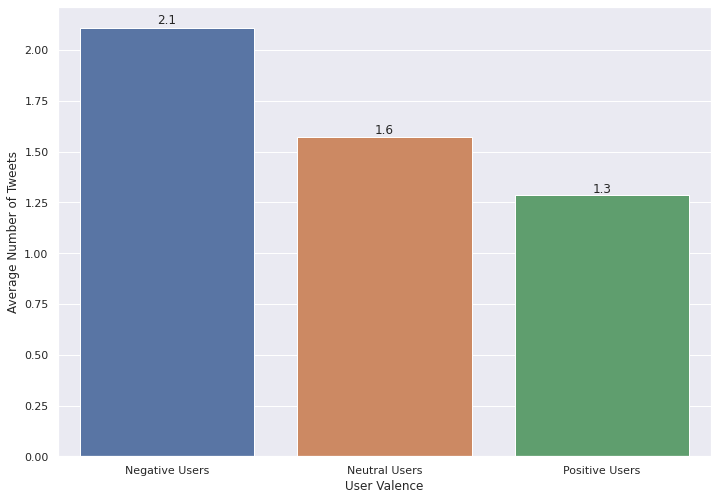

In [ ]:
# Making the barplot
p = sns.barplot(data=mean_tweets)
p.set(ylabel="Average Number of Tweets", xlabel = "User Valence")
show_values(p)

As we can see, my hypothesis was completely correct. Negative users are flooding Twitter with negative tweets, biasing the sample a great deal.

Without them drowning out the other voices, we will be able to get a more accurate picture of how vocal people on Twitter actually feel about the airlines.

## Sentiment Analysis

Sentiment is one of the core columns. We have to understand the distribution of sentiments if we are to analyze the problems we're seeing.

### Sentiment Distributions

#### Sentiment Proportion

In [ ]:
def sentiment_donut(df, airline):
  """
  plot for Sentiment Labels
  df = dataframe. Must include airline_sentiment column
  airline = airline name
  """
  colors = ['#ff6666', '#ffcc99', '#99ff99']

  sns.set(rc={'figure.figsize':(11.7,8.27)})
  plot = plt.pie(df['airline_sentiment'].value_counts(), labels=df['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
  centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.title(f'Pie plot for {airline} Sentiment Labels')
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

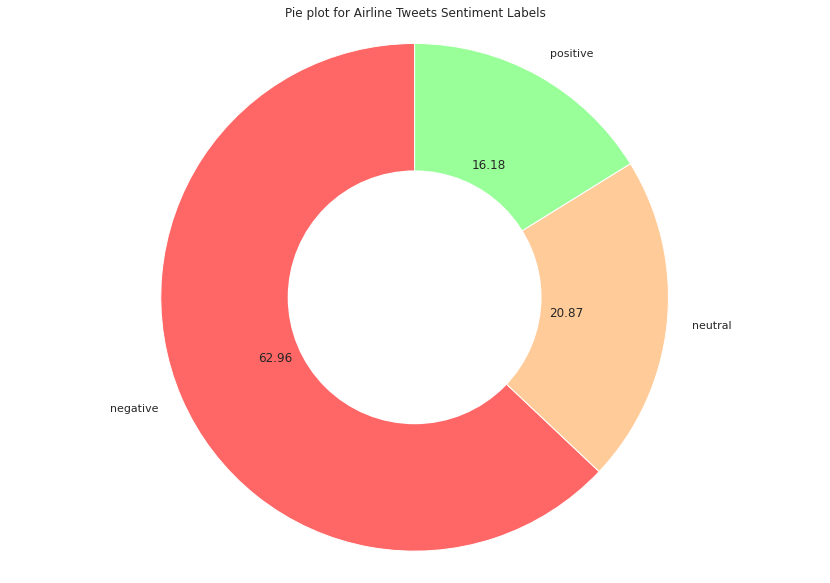

In [ ]:
# Pure Tweet count sentiment
sentiment_donut(df, 'Airline Tweets')

This is by the number of tweets that are in their respective categories. I want to compare it to overall user sentiment.

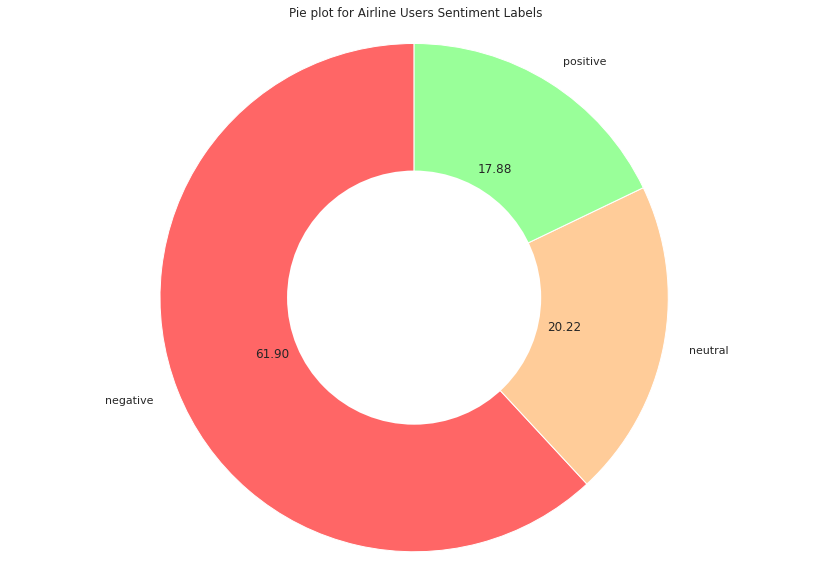

In [ ]:
# Sentiment of Users overall
sentiment_donut(tweet_frequency, 'Airline Users')

The user sentiment is largely similar, though I note that there is about a 1% difference in negative, and a 1.7% difference in positive tweets. This may not seem like a big difference, but because of the size of the database 1% is still a big difference in terms of quantity.

That's far more negative than positive and neutral, which is unsprising given the nature of angry people. Content people are much less likely to proactively seek comfort in others by venting their frustrations online.

#### Word Length Distribution

It could also be insightful to see which tweets are longer.

In [ ]:
# Making a word count column in our df
df['word_count'] = [len(t.split()) for t in df.text]

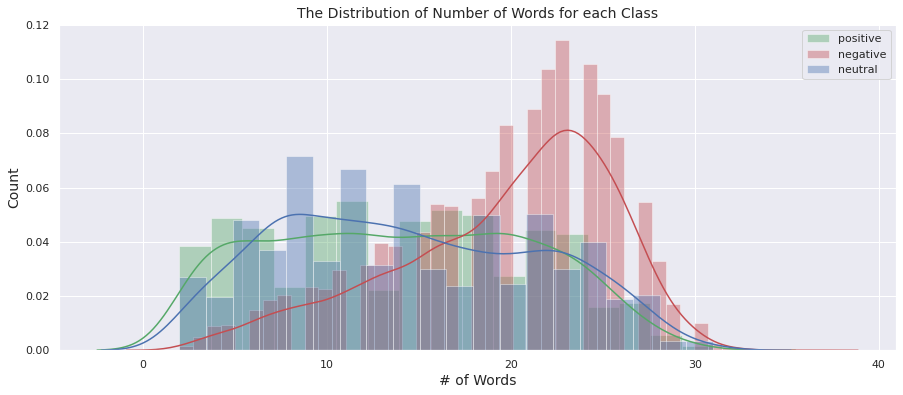

In [ ]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(df['word_count'][df['airline_sentiment']=='positive'], color='g', label = 'positive')
sns.distplot(df['word_count'][df['airline_sentiment']=='negative'], color='r', label = 'negative')
sns.distplot(df['word_count'][df['airline_sentiment']=='neutral'], color='b', label = 'neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

As can be seen, the distribution of words weighs heavily towards negative tweets. Neutral and positive tweets tend to be much shorter, probably a simple "thanks" is enough. Meanwhile, negative tweets take their time explaining or raging.

### Dividing tweets into airline

However, the above distributions don't give us enough information: We have to divide by airline. This is more complicated than it seems because there seems to be errors in the airline column.

Above, in the tweet_cord sample, we saw index number 7495. It said "delta" but the tweet was labeled "Jetblue". Let's check it out.

In [ ]:
# Displaying the airline of 7495 and then the tweet of 7495
df['airline'][7495], df['text'][7495]

('Delta',
 '@jetblue  Flight 1562 is still waiting for bags. Most of us checked in 12 hours ago. People are missing connections.  Please help!')

This implies there may be labeling errors in the airline column. JetBlue is not associated with Delta.

I'm going to extract which airline was mentioned by @ and compare that to the airline label.

In [ ]:
# Let's look at what airlines we're looking at
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Well that's an immediate problem: JetBlue is not a label. Let's see what other problems appear.

In [ ]:
"""
At this step I am going to isolate only the @ mentions and then isolate those terms.
Ideally at least one of the mentions will be the airline label. We can find errors
by comparing the mentions to the label.
"""

at_list = []                          # Make an empty list for the column
for i,x in df['text'].iteritems():    # Iterate through every tweet while maintaining index location
  only_at = []                        # Another empty list for each individual row
  x = x.replace(':'," ")              # Sometimes people type without a space, fixing that early
  x = x.replace('-'," ")              
  x = x.replace('.'," ")              
  x = x.replace('\''," ")             
  x = x.replace(';'," ")
  x = x.replace('“'," ")
  x = x.replace('?', " ")
  x = x.replace('#', " ")             
  x = re.sub(r'[^\w\s@]', '', x)      # getting rid of all special characters except @
  for word in x.split():              # Splitting the tweet into a list of words
    if word.startswith('@') == True:  # If the word in the list starts with @....
      only_at.append(word)            # Then we add it to the row's empty list
  at_list.append(only_at)             # Now we add the row list to the column list

In [ ]:
# Now we add the list we made to the dataframe for comparisons
df['at_list'] = at_list

In [ ]:
# Sanity check to see if it worked
df.at_list[190]

['@VirginAmerica', '@asarco_ES_ar']

Ok, it worked. We now have a list of all the mentions in each tweet. Now I want to remove the @ just in case the airline is mentioned without the @.

In [ ]:
def remove_special_characters(text, remove_digits=True): #This removes punctuation and numbers as well.
    new_words = []
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    for word in text:
      new_word = re.sub(pattern, '', word)
      if new_word != '':
        new_words.append(new_word)
    return new_words

In [ ]:
# Similar method as above: Make empty list, modify each row, then add it to the list
cleaned_atlist = []
for i,x in df['at_list'].iteritems():
  a = remove_special_characters(df['at_list'][i])
  cleaned_atlist.append(a)
# Now we replace the old dataframe's column with the new clean list
df['at_list'] = cleaned_atlist

In [ ]:
# Sanity check to see if it worked
df['at_list'].head()

0    [VirginAmerica, dhepburn]
1              [VirginAmerica]
2              [VirginAmerica]
3              [VirginAmerica]
4              [VirginAmerica]
Name: at_list, dtype: object

Great, it worked. We now have all the mentions without any special characters.

We're going to want to analyze tweet sentiment by airline anyway, so I'm going to split off each airline's tweets into a respective database. That way our future modeling can be targetted to specific airlines.

After all, wouldn't it be embarassing if the best way to predict if a tweet was positive or negative was if one of the airlines was mentioned? We'll want to isolate the airlines from one another to give proper business insights.


In [ ]:
# Somehow the index got goofed up, this fixes it.
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

In [ ]:
# Make empty dataframes so we can append the entries for that airline
virginamerica = pd.DataFrame(columns=df.columns)
united = pd.DataFrame(columns=df.columns)
southwest = pd.DataFrame(columns=df.columns)
delta = pd.DataFrame(columns=df.columns)
usairways = pd.DataFrame(columns=df.columns)
american = pd.DataFrame(columns=df.columns)

In [ ]:
# Now we go through the entire dataframe. If an airline is mentioned, that tweet goes into that airline's dataframe.
# This way if a tweet mentions more than one airline at once it will be duplicated into both dataframes.
for i, x in df.iterrows():
  if df['airline'][i] == 'Virgin America':
    if 'virginamerica' in [item.lower() for item in df['at_list'][i]]: # the item.lower is putting everything in lowercase
      virginamerica.loc[i] = df.iloc[i].copy()
  if df['airline'][i] == 'United':
    if 'united' in [item.lower() for item in df['at_list'][i]]:
      united.loc[i] = df.iloc[i].copy()
  if df['airline'][i] == 'US Airways':
    if 'usairways' in [item.lower() for item in df['at_list'][i]]:
      usairways.loc[i] = df.iloc[i].copy()
  if df['airline'][i] == 'American':
    if 'americanair' in [item.lower() for item in df['at_list'][i]]:
      american.loc[i] = df.iloc[i].copy()
  if df['airline'][i] == 'Southwest':
    if 'southwestair' in [item.lower() for item in df['at_list'][i]]:
      southwest.loc[i] = df.iloc[i].copy()
  if df['airline'][i] == 'Delta':
    if 'delta' in [item.lower() for item in df['at_list'][i]]:
      delta.loc[i] = df.iloc[i].copy()

In [ ]:
# As a reminder: What airlines are we looking at?
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2160
Virgin America     503
Name: airline, dtype: int64

In [ ]:
# Get the shapes of each airline dataframe. The numbers should be identical to the above value_counts.
united.shape[0], usairways.shape[0], american.shape[0], southwest.shape[0], delta.shape[0], virginamerica.shape[0], 

(3822, 2913, 2759, 2420, 4, 503)

There are no discrepencies except for Delta. What is going on there?

In [ ]:
# Let's print the tweets that DO mention Delta
for i, x in delta['text'].iteritems():
  print(i, x)

6827 @JetBlue can't link my flight from last week to my TruBlue account and 1800 num isn't answering..don't make me fly @Delta again, dont do it!
7641 @JetBlue that's where we all get on the same page. Cancelled Flighted it 45 mins ago. @delta @SouthwestAir help flights from @tfgreenairport to MCO?
7642 @Jetblue I'm so sorry I cheated on you with @Delta @DeltaAssist. Please take me back. I wore protection.
8472 @JetBlue C'mon now. My flight's delayed annnnnd you can't give me a pick?!? I'm about to tweet at @united or @Delta .......


Huh. These all seem to be primarily about JetBlue.

I wonder if the labelers just didn't know that JetBlue and Delta are different?

If the labelers mistook Delta for JetBlue, then if I search for @JetBlue mentions, it should scoop up all of the Delta labels.

In [ ]:
# Checking which Delta labels actually mention JetBlue
delta = pd.DataFrame(columns=df.columns)
for i, x in df.iterrows():
  if df['airline'][i] == 'Delta':
    if 'jetblue' in [item.lower() for item in df['at_list'][i]]:
      delta.loc[i] = df.iloc[i]

If it caught all of the "Delta" labels, it should end up with 2160 entries.

In [ ]:
delta.shape[0]

2156

So there are 4 Delta-labeled tweets that don't mention JetBlue. Let's look at them.

In [ ]:
# Isolating index numbers labeled Delta but that don't contain jetblue
different_delta = df[df['airline'] == 'Delta'].index.difference(delta.index)

In [ ]:
# Printing the resulting four tweets that are labeled Delta but don't mention JetBlue
for i in different_delta:
  print(df['text'][i])

@shannonwoodward If you want, we can keep you updated on who's wearing who, &amp; who's with who, &amp; who wins what. We're nice like that. ;)
@NinaDavuluri We think it's a treat to have you onboard! Enjoy your flight. 💙
@DeltaAssist now at 57 minutes waiting on Silver Elite line for someone to pick up! Help!
@DeltaAssist what I have to say is more than 140 characters! Plus you don't follow me


Delta Assist are in fact Delta tweets. The other two don't seem like they should be included in the analysis at all.

I think we should drop these entirely. We don't have enough Delta tweets to analyze anything. We have, at best, 6 Delta tweets. That's too small of a sample.

In [ ]:
#I'm going to drop them from the original dataset. They're already excluded from delta
for i in different_delta:
  df.drop(i, axis=0, inplace=True)

In [ ]:
# Changing all delta labels to JetBlue
for i, x in df.iterrows():
  if df.at[i,'airline'] == 'Delta':
    df.at[i,'airline'] = 'JetBlue'

In [ ]:
# Checking to ensure it worked. We should have 2218 JetBlue
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
JetBlue           2156
Virgin America     503
Name: airline, dtype: int64

In [ ]:
# Changing the name of our jetblue dataframe
jetblue = delta
#Deleting the old delta dataframe
del(delta)
gc.collect()

350

That was quite the effort, but now that we've checked and separated the airline labels, we can analyse the sentiment of tweets by airline.

We also want to analyze sentiment by user by airline. I'll quickly add that to our user dataframe.

In [ ]:
# Make an empty airline column to be filled in
tweet_frequency['airline'] = '0'

In [ ]:
tweet_frequency

Tweet_count  Positive_tweets  ...  airline_sentiment  airline
Username                                     ...                            
0504Traveller            5                0  ...            neutral        0
09202010                 2                0  ...           negative        0
0veranalyser             2                0  ...           negative        0
0xjared                  1                0  ...            neutral        0
10Eshaa                  1                0  ...            neutral        0
...                    ...              ...  ...                ...      ...
zombiesausage            1                1  ...           positive        0
zozo24dad                1                0  ...            neutral        0
zsalim03                 2                0  ...           negative        0
zslick99                 1                0  ...           negative        0
zupshawrl                1                1  ...           positive        0

[7700 rows x 6 columns]

In [ ]:
# Set the username to be the index so we can cross-reference
# tweet_frequency = tweet_frequency.set_index('Username')
# Iterate through our main df, copying which airline each tweeter talked about to our user df
for i, x in df.iterrows():
  for name in df.groupby(['name']).text.count().index:
    if x.at['name'] == name:
      if df.at[i, 'airline'] == 'Virgin America':
        tweet_frequency.at[name,'airline'] = 'Virgin America'
      if df.at[i, 'airline'] == 'United':
        tweet_frequency.at[name,'airline'] = 'United'
      if df.at[i, 'airline'] == 'Southwest':
        tweet_frequency.at[name,'airline'] = 'Southwest'
      if df.at[i, 'airline'] == 'JetBlue':
        tweet_frequency.at[name,'airline'] = 'JetBlue'
      if df.at[i, 'airline'] == 'US Airways':
        tweet_frequency.at[name,'airline'] = 'US Airways'
      if df.at[i, 'airline'] == 'American':
        tweet_frequency.at[name,'airline'] = 'American'       

In [ ]:
# Now we check to see if it worked
# tweet_frequency.head()

Ok it's looking good, we should be able to do an analysis by user now.

I'm going to save the file so we don't have to compute it each time I re-run the notebook.

In [ ]:
# # tweet_frequency.to_csv('tweet_sentiment_by_user.csv')
# # from google.colab import files
# # files.download('tweet_sentiment_by_user.csv')
# tweet_frequency = pd.read_csv('/content/drive/MyDrive/UT_Course_project_notebooks/tweet_sentiment_by_user.csv')
# tweet_frequency = tweet_frequency.set_index('Username')

In [ ]:
tweet_frequency.head()

Tweet_count  Positive_tweets  ...  airline_sentiment     airline
Username                                     ...                               
0504Traveller            5                0  ...            neutral   Southwest
09202010                 2                0  ...           negative  US Airways
0veranalyser             2                0  ...           negative    American
0xjared                  1                0  ...            neutral     JetBlue
10Eshaa                  1                0  ...            neutral     JetBlue

[5 rows x 6 columns]

### Preprocessing steps

For a more in-depth look at our tweets and for model building we'll have to tokenize and fix some common errors. Twitter users aren't known for their orthodox language use.

This will allow us to see what words are used most often for different airlines and sentiments.

I'm going to define functions for all the preprocessing steps and then make a new column for the processed tweets. That way we can compare to the originals if we want to.

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")    # Removing HTML tags
    text = soup.get_text()
    return text

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    words = [word.lower() for word in words.split()]
    words = " ".join(words)
    return words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

def spelling_correction(text):
    ''' 
    This function will correct spellings.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text after corrected spellings.
        
    Example: 
    Input : This is Oberois from Dlhi who came heree to studdy.
    Output : This is Oberoi from Delhi who came here to study.
    '''
    # Check for spellings in English language
    spell = Speller(lang='en')
    Corrected_text = spell(text)
    return Corrected_text

def remove_numbers(text): #This removes punctuation and numbers as well.
    new_words = []
    pattern = r'[^a-zA-z\s]'
    for word in text:
      if '``' in word:
        text.remove(word)
    for word in text:
      new_word = re.sub(pattern, '', word)
      if new_word != '':
        new_words.append(new_word)
    return new_words

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    stopword_list = nltk.corpus.stopwords.words('english')
    stopword_list.remove('no') # We want to retain the negative words to maintain sentiment scores
    stopword_list.remove('not')
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopword_list:
            new_words.append(word)        # Append processed words to new list.
    return new_words

# We won't be using stem_words, but I wanted to include the function in case a reader would prefer it

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

def normalize(words):
    words = strip_html(words)
    words = to_lowercase(words)
    words = spelling_correction(words)
    words = replace_contractions(words)
    words = reducing_incorrect_character_repeatation(words) 
    words = nltk.word_tokenize(words) # All of the above require string input, below uses lists.
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return words

Before we run these functions over the entire corpus, let's run it on a sample and see how it works.

In [ ]:
# Running on a sample tweet
words = df['text'][3]+'#$@123' + " soooooo" + " giude" #Adding some mispelled words
print("Original text:\n", words)
words = strip_html(words)
print("Stripping html:\n", words)
words = to_lowercase(words)
print("Changing to lowercase:\n", words)
words = spelling_correction(words)
print("Correcting spelling:\n", words)
words = replace_contractions(words)
print("Replacing contractions:\n", words)
words = reducing_incorrect_character_repeatation(words)
print("Fixing repeated characters:\n", words)                                                 
words = nltk.word_tokenize(words) # All of the above require string input, below uses lists.
print("Tokenizing:\n", words)
words = remove_non_ascii(words)
print("Removing non-ascii:\n", words)
words = remove_punctuation(words)
print("Removing punctuation:\n", words)
words = remove_numbers(words)
print("Removing digits:\n", words)
words = remove_stopwords(words)
print("Removing stopwords:\n", words)
words = lemmatize_verbs(words)
print("Lemmatizing words:\n", words)

Original text:
 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse#$@123 soooooo giude
Stripping html:
 @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse#$@123 soooooo giude
Changing to lowercase:
 @virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse#$@123 soooooo giude
Correcting spelling:
 @virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse#$@123 soooooo guide
Replacing contractions:
 @virginamerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse#$@123 soooooo guide
Fixing repeated characters:
 @virginamerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse#$@123 soo guide
Tokeniz

In [ ]:
# Don't need the example anymore
del words
gc.collect()

57

In [ ]:
df.drop('level_0', axis=1, inplace=True)

In [ ]:
df = df.reset_index()

In [ ]:
df.drop('index', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14573 non-null  object 
 1   airline_sentiment_confidence  14573 non-null  float64
 2   negativereason                9175 non-null   object 
 3   negativereason_confidence     10514 non-null  float64
 4   airline                       14573 non-null  object 
 5   airline_sentiment_gold        38 non-null     object 
 6   name                          14573 non-null  object 
 7   negativereason_gold           30 non-null     object 
 8   retweet_count                 14573 non-null  int64  
 9   text                          14573 non-null  object 
 10  tweet_created                 14573 non-null  object 
 11  word_count                    14573 non-null  int64  
 12  at_list                       14573 non-null  object 
dtypes

In [ ]:
clean_list2 = []
for i in range(0,5):
  clean_list2.append(normalize(df['text'][i]))
clean_list2

[['virginamerica', 'dhepburn', 'say'],
 ['virginamerica', 'plus', 'add', 'commercials', 'experience', 'tack'],
 ['virginamerica',
  'not',
  'today',
  'must',
  'mean',
  'need',
  'take',
  'another',
  'trip'],
 ['virginamerica',
  'really',
  'aggressive',
  'blast',
  'obnoxious',
  'entertainment',
  'guests',
  'face',
  'little',
  'recourse'],
 ['virginamerica', 'really', 'big', 'bad', 'thing']]

In [ ]:
clean_list = []
for i in range(0,len(df)):
  clean_list.append(normalize(df['text'][i]))

In [ ]:
#checking to see if the list is correct: It should be tokenized
clean_list[0]

['virginamerica', 'dhepburn', 'say']

In [ ]:
# Now to turn the tweets back into strings via .join
clean_list_series = pd.Series(clean_list) # Needs to be a Series so we can iterate through it.
joined_clean_list = []
for i, x in clean_list_series.iteritems():
  joined_list = " ".join(x)
  joined_clean_list.append(joined_list)

In [ ]:
# Adding the normalized text to our df.
df['text_normalized'] = joined_clean_list

In [ ]:
# df.to_csv('Preprocessed_Data.csv')
# from google.colab import files
# files.download('Preprocessed_Data.csv')

In [ ]:
# # The lists are now redundant, we can delete them.
# del(clean_list)
# del(joined_normal_text)

In [ ]:
# # Getting rid of the list
# gc.collect()

In [ ]:
# # Loading the preprocessed data from MyDrive to save time
# df = pd.read_csv('/content/drive/MyDrive/UT_Course_project_notebooks/Preprocessed_Data.csv')

In [ ]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Let's check out the first five rows now that we've pre-processed everything
df.head(5)

airline_sentiment  ...                                    text_normalized
0           neutral  ...                         virginamerica dhepburn say
1          positive  ...  virginamerica plus add commercials experience ...
2           neutral  ...  virginamerica not today must mean need take an...
3          negative  ...  virginamerica really aggressive blast obnoxiou...
4          negative  ...                 virginamerica really big bad thing

[5 rows x 14 columns]

In [248]:
# The above won't let us see the entire tweets, so I'll print them here.
for i in df['text_normalized'][0:5]:
  print(i)

virginamerica dhepburn say
virginamerica plus add commercials experience tack
virginamerica not today must mean need take another trip
virginamerica really aggressive blast obnoxious entertainment guests face little recourse
virginamerica really big bad thing


It seems like the preprocessing worked. The stop words are gone, there's no punctuation or special characters, etc. It's nice and clean and ready to go.

For our sentiment analysis we may also want to visualize the words that summarize the tweets overall and for each individual airline. To that end, we'll have to make a function.

In [ ]:

# Making a function to create a summarized wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text_normalized'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

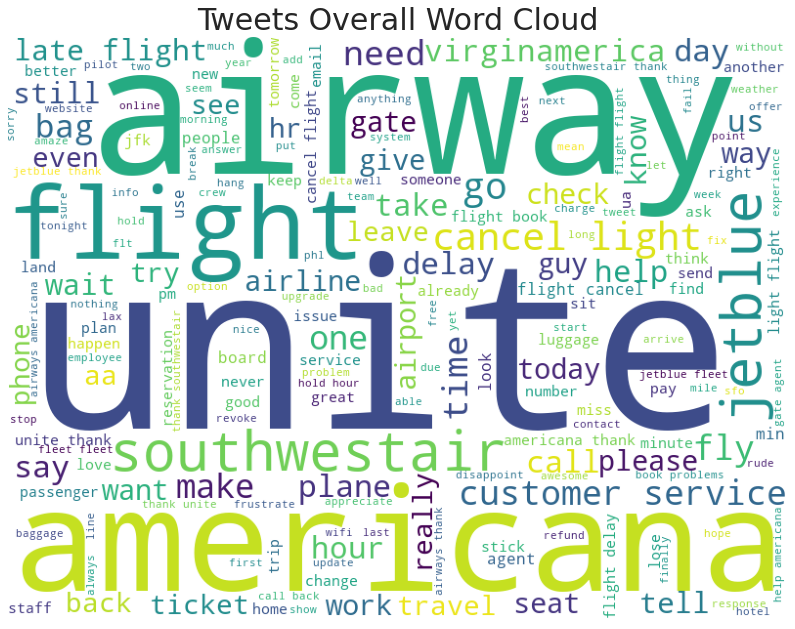

In [ ]:
show_wordcloud(df, "Tweets Overall Word Cloud")

As we can see from this word cloud, it's not all that useful because the most common words are the airlines themselves. What it can do, though, is perhaps give us a tease on which airlines are most liked and most hated. Let's do another few wordclouds based on tweet sentiment.



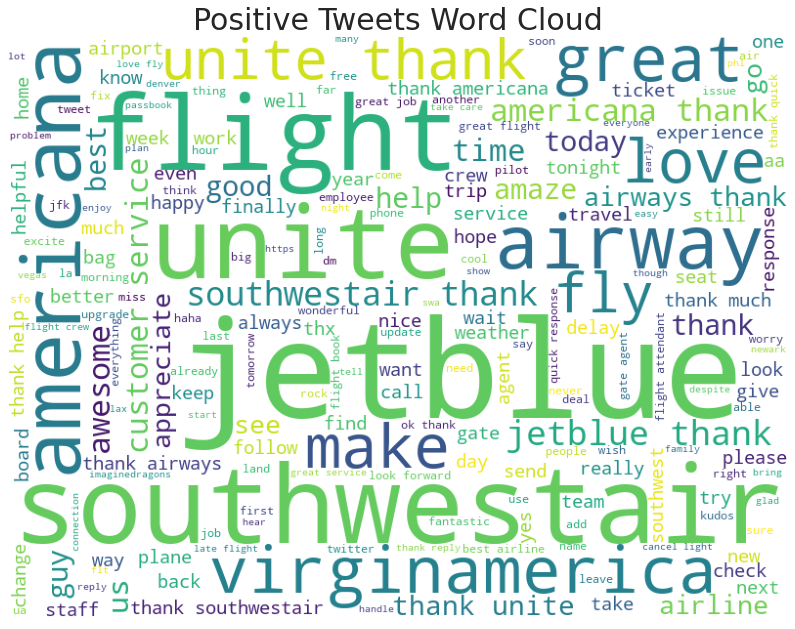

In [ ]:
show_wordcloud(df[df['airline_sentiment']== 'positive'], "Positive Tweets Word Cloud")

Besides the airline names themselves, we see a lot of words that are quite positive: thank, best, love, great, etc. Thank actually appears multiple times.

Based on the size of the airline names, we can expect that JetBlue, United, and Southwest may have the most positive tweets. Let's see.

In [ ]:
df[df['airline_sentiment']== 'positive'].groupby(['airline']).airline_sentiment.count()

airline
American          336
JetBlue           538
Southwest         570
US Airways        269
United            492
Virgin America    152
Name: airline_sentiment, dtype: int64

Yes, JetBlue, United, and Southwest have the most positive tweets total. That's not all that useful on its own. We'll look at proportion of positive/negative tweets of each airline individually later.

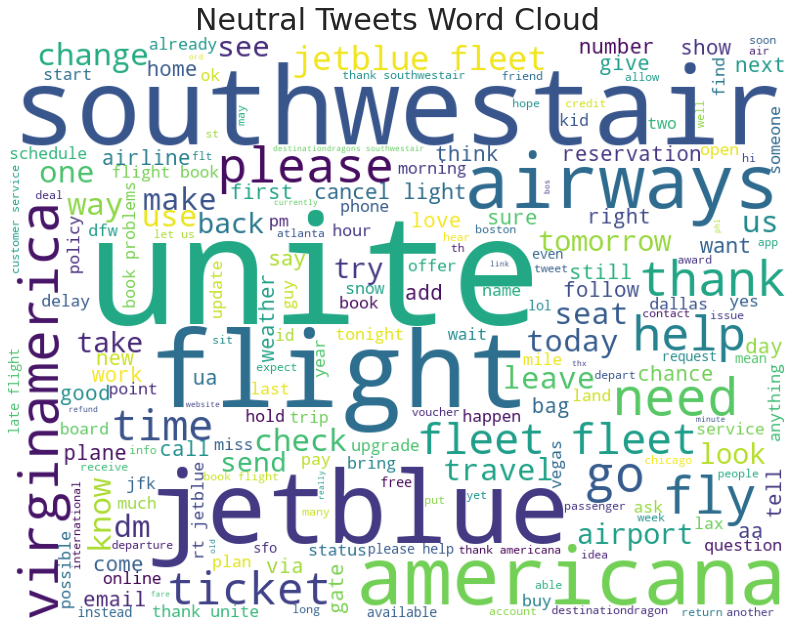

In [ ]:
show_wordcloud(df[df['airline_sentiment']== 'neutral'], "Neutral Tweets Word Cloud")

United, JetBlue, and Southwest once again seem to have the most tweets about them, though this time it's neutral.

Otherwise, it seems like neutral tweets tend to be questions about times, about flights, and ticketing. "help" is quite big, meaning I bet these tweets are inquiries directed at the airlines.

In [ ]:
# Getting neutral tweet counts by airline
df[df['airline_sentiment']== 'neutral'].groupby(['airline']).airline_sentiment.count()

airline
American          463
JetBlue           666
Southwest         664
US Airways        381
United            697
Virgin America    170
Name: airline_sentiment, dtype: int64

Once again JetBlue, United, and Southwest are tweeted about the most in our dataset. This could just be a bias in our sampling.

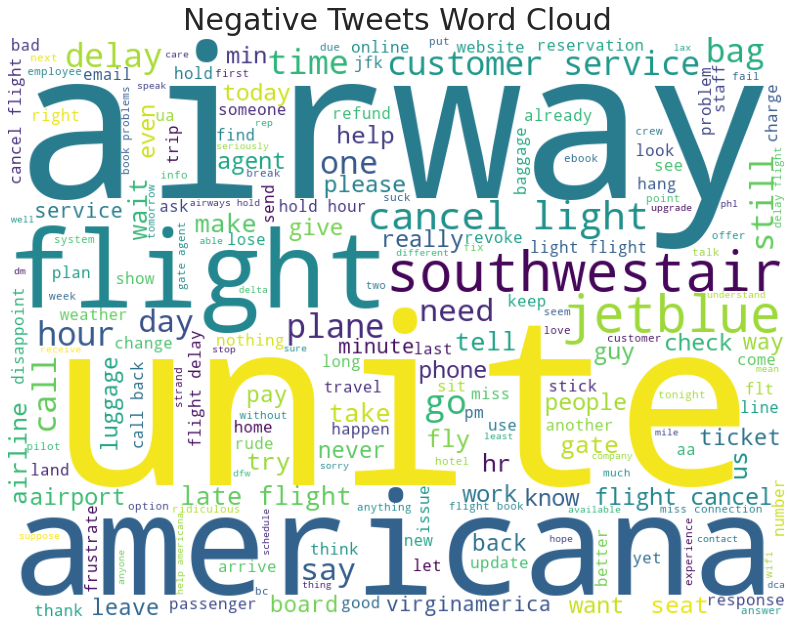

In [ ]:
show_wordcloud(df[df['airline_sentiment']== 'negative'], "Negative Tweets Word Cloud")

Wow, the negative tweets really focus on United and American. I expect they will be very much disliked in our airline-specific analyses.

Except for airline names, people seem to be complaining about delays, cancelations, time (late flights etc.), and customer service.

In [ ]:
# Getting negative tweet counts by airline
df[df['airline_sentiment']== 'negative'].groupby(['airline']).airline_sentiment.count()

airline
American          1960
JetBlue            952
Southwest         1186
US Airways        2263
United            2633
Virgin America     181
Name: airline_sentiment, dtype: int64

Now I see why airway was so big, US Airways was reduced to airways by our stopword preprocessing. The large number of negative tweets about US Airways clues me in to this.

United, as seen from the word cloud, takes top rank though: Lots of negative tweets here.

Still, that doesn't mean much as our dataset is bias in the total number of tweets about airlines.

### Negative Reasons Overall

The reason behind all the negativity is important. So, we want to look at this overall and for each airline specifically.

In [ ]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1188
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       177
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [ ]:
def negativereason_donut(df, airline):
    colors = ['#ff6666', '#ffcc99', '#99ff99']

    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plot = plt.pie(df['negativereason'].value_counts(), labels=df['negativereason'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f"Pie plot for Negative Reasons behind {airline}'s negative tweets")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

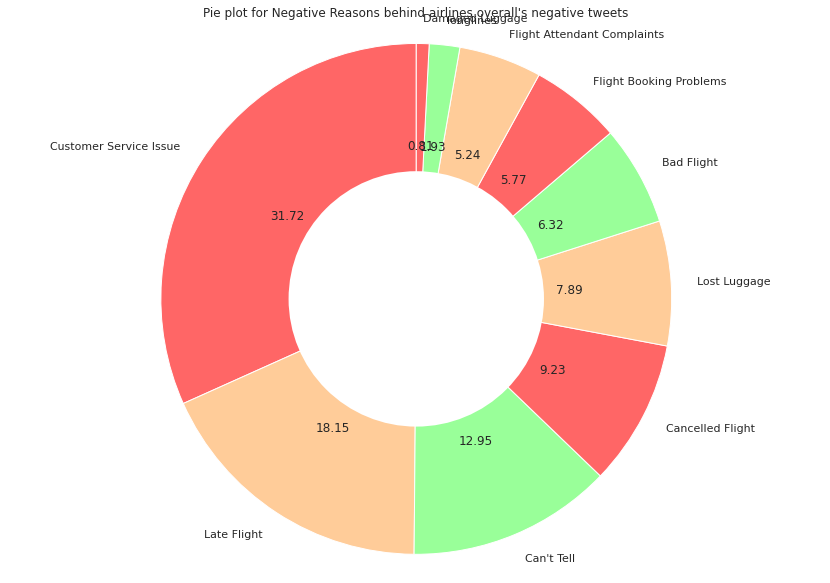

In [ ]:
negativereason_donut(df, 'airlines overall')

It seems like the largest issue of complaint overall is customer service, and behind that by a large margin are late flights.

### United Sentiment

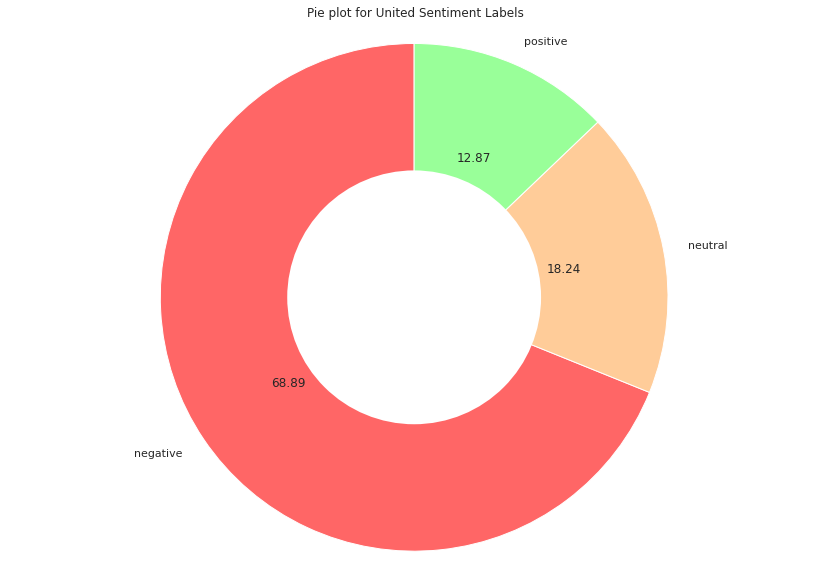

In [ ]:
sentiment_donut(united, 'United')

Clients on Twitter widely were very negative about United Airlines (69%), this was well above average for all of the airlines (63%).

The positive and neutral tweets are correspondingly less, but are about the same ratio to each other as average (neutral is about about 1.4x higher).

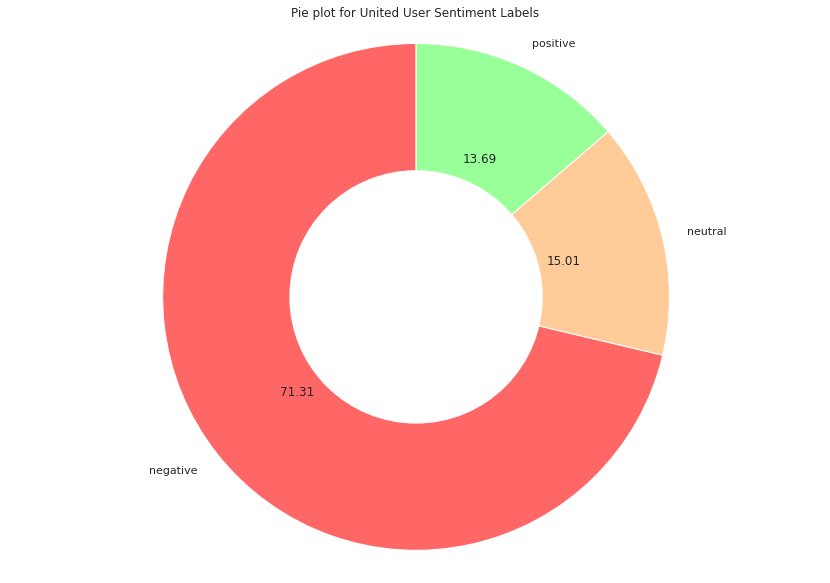

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='United'], 'United User')

When looking at user sentiments the picture is even worse for United. Apparently, neutral United users were more vocal than normal, so when the number of tweets was controlled for the proportion of neutral went down.

71% of users who commented on United were negative, compared to 69% of all tweets.

There is some consolation in that positive user percentage also went up about 0.9%.

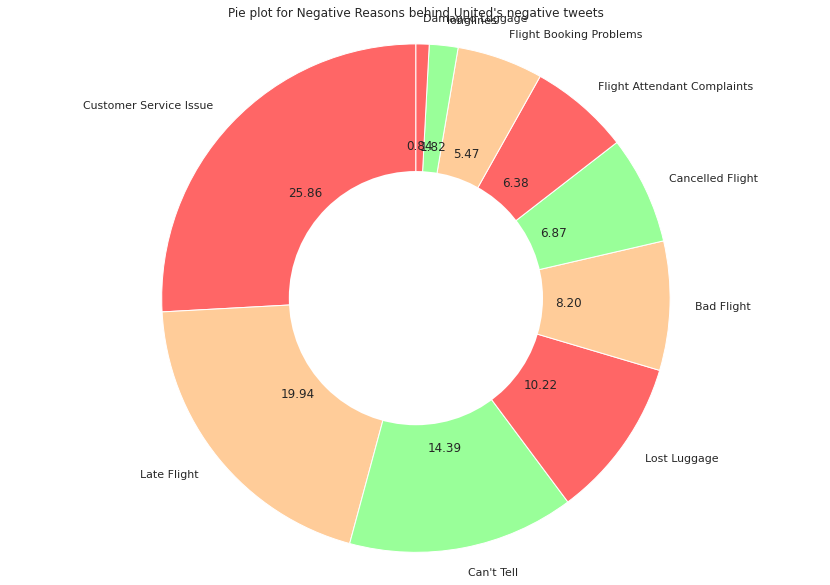

In [ ]:
negativereason_donut(united, 'United')

United had far fewer complaints proportionally about customer service (26%) than average (32%). The remaining complaints were spread relatively evenly across the other categories.

### US Airways sentiment

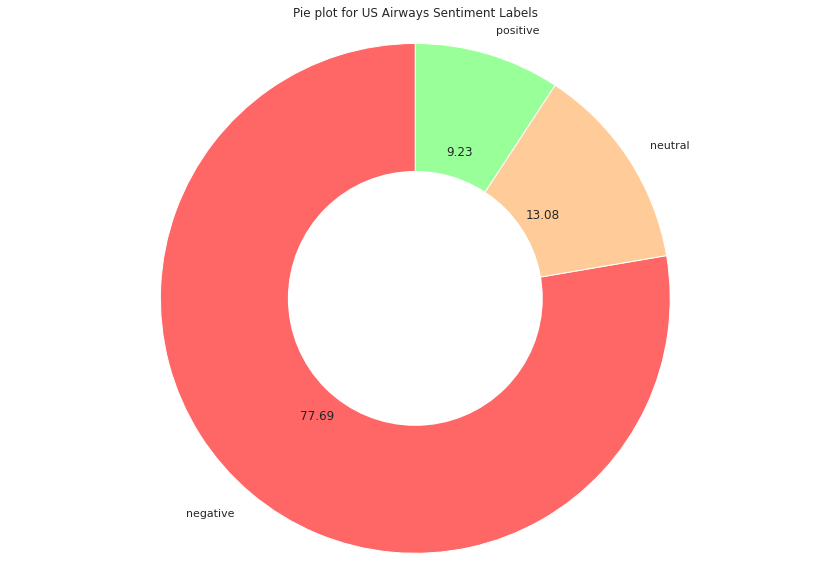

In [ ]:
sentiment_donut(usairways, 'US Airways')

Vocal Twitter users really don't like US Airways, giving them a savage 78% negative tweet rate compared to the 63% average. This is the most negative proportion for all the airlines.

The positive and neutral tweets remain about the same ratio in relation to each other as average.

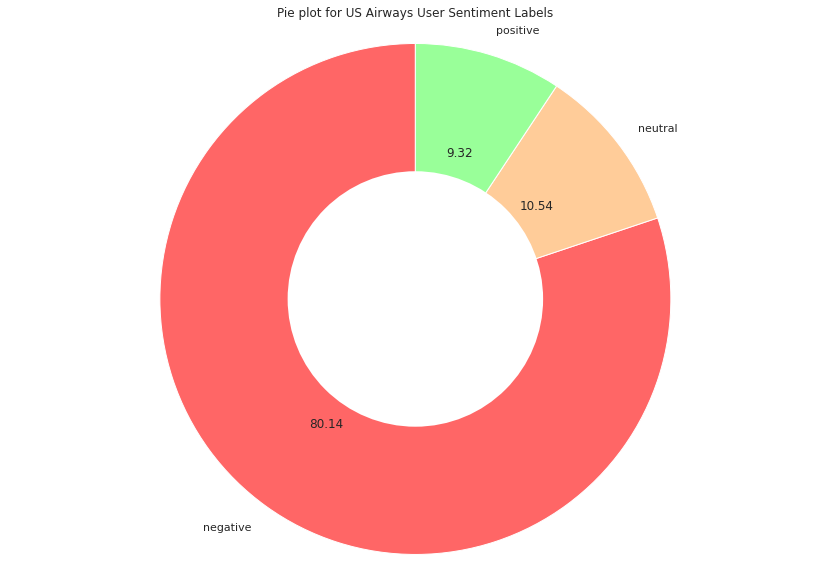

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='US Airways'], 'US Airways User')

Apparently some of the neutral users of US Airways were quite talkative, because when we control for tweets we find that neutrals account for fewer of the total.

80% of those who tweeted about US Airways were negative.

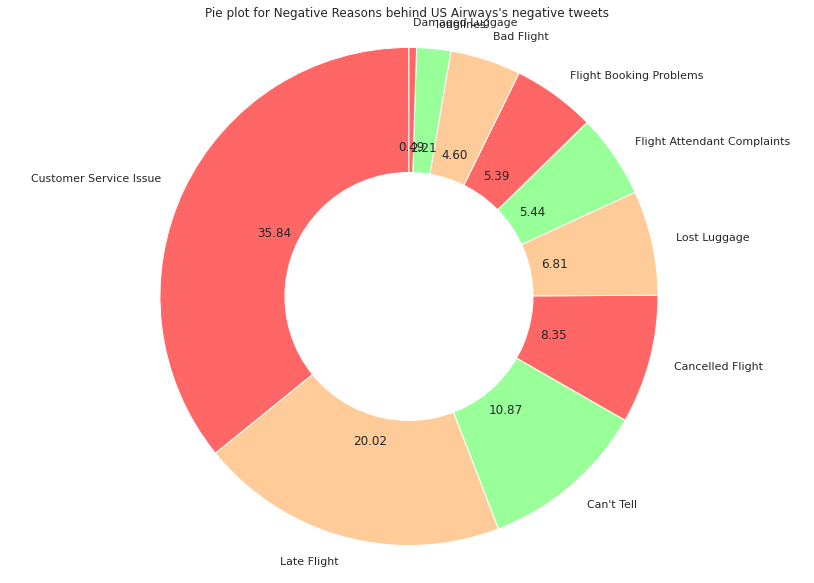

In [ ]:
negativereason_donut(usairways, 'US Airways')

US Airways had more customer complaints (36%) than average (32%), and more late flights too.

### American Airlines Sentiment

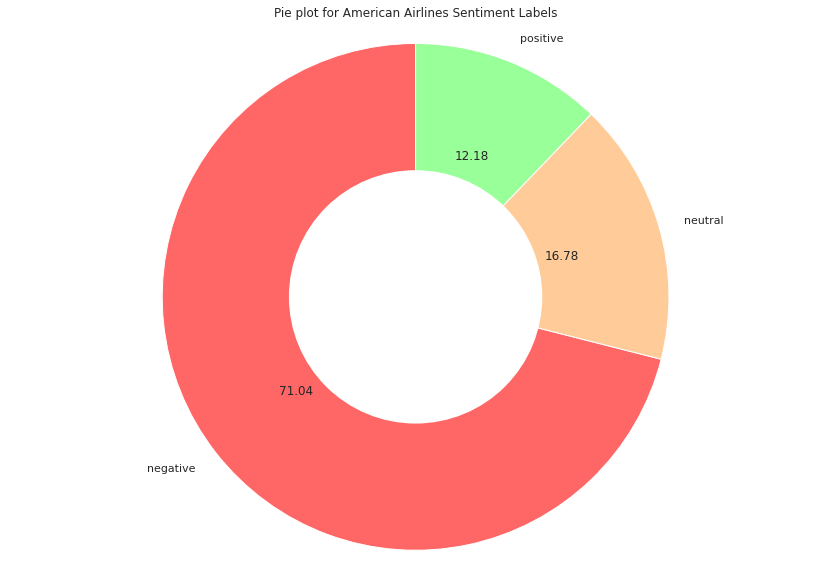

In [ ]:
sentiment_donut(american, 'American Airlines')

Continuing the negative trend, the vast majority of tweets about American Airlines are negative, with 71% being negative compared to the 63% average.

Positive and neutral tweets remain in about the same proportion in relation to each other as on average.

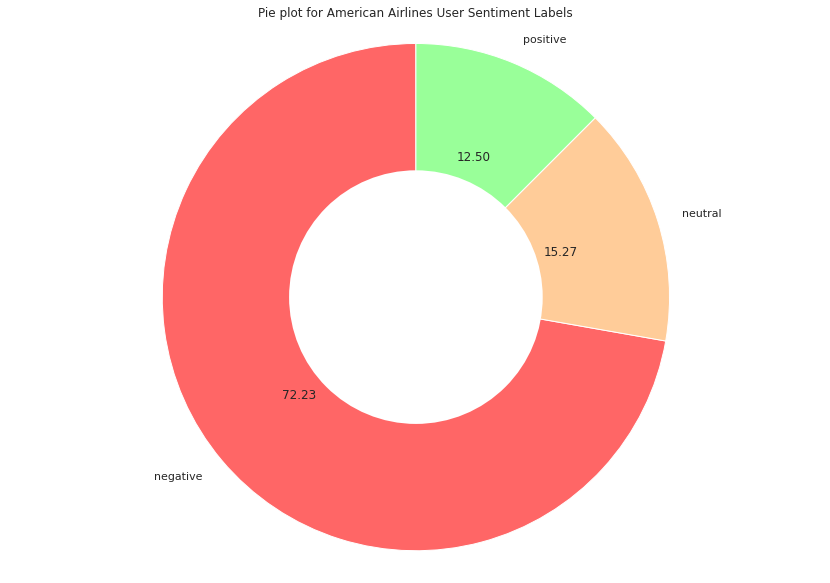

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='American'], 'American Airlines User')

Again, neutral users seemed to be more vocal for American Airlines, taking up a smaller percent of the total when all tweets are taken into account. This means that more people are negative than it would appear for American airlines.

72% of users are negative, 13% positive and 15% neutral.

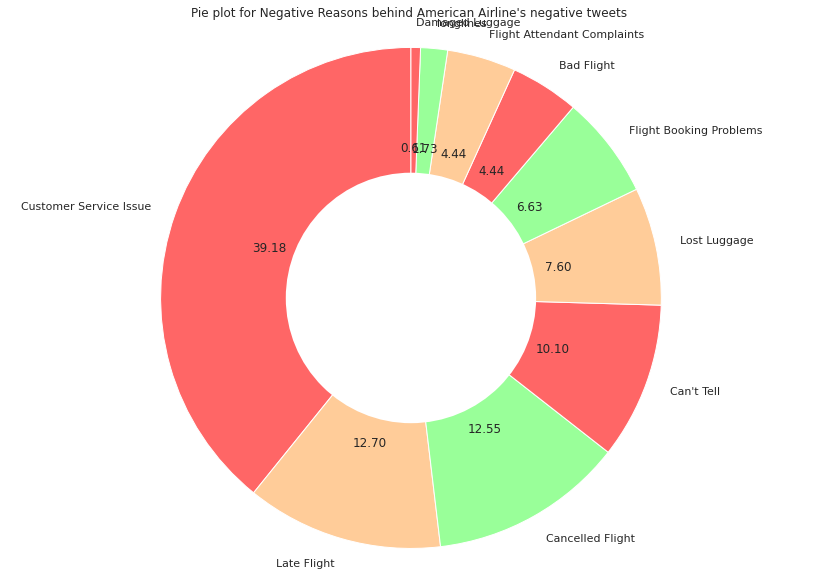

In [ ]:
negativereason_donut(american, 'American Airline')

American Airlines had more customer complaints (39%) than average (32%), and far more cancelled flights (13%) than average (9%). The flights that weren't canceled garnered fewer complaints (4%) than average (6%). 

### Southwest Airlines Sentiment

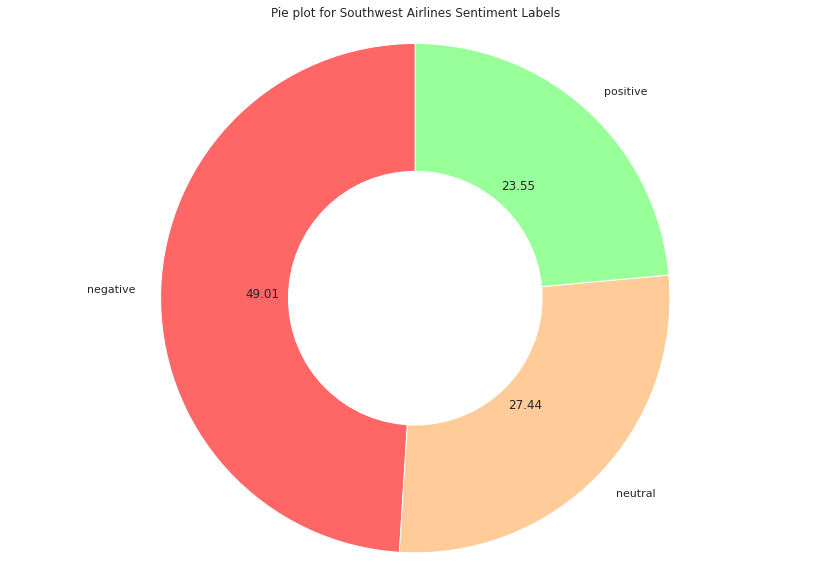

In [ ]:
sentiment_donut(southwest, 'Southwest Airlines')

Southwest Airlines bucks the trend with fewer than half (49%) of all tweets being negative. 

Positive tweets had a higher proportion than previously, with neutral tweets only being about 1.2x higher instead of 1.4x higher.

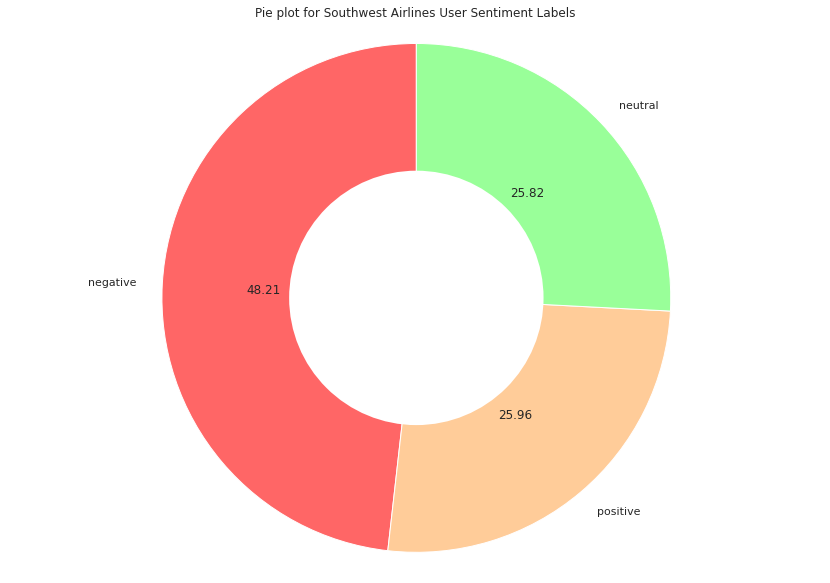

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='Southwest'], 'Southwest Airlines User')

In contrast with the previous airlines, Southwest has more positive users than negative compared to when all tweets are counted.

48% of users were negative, with approximately the same users positive and negative (about 26%).

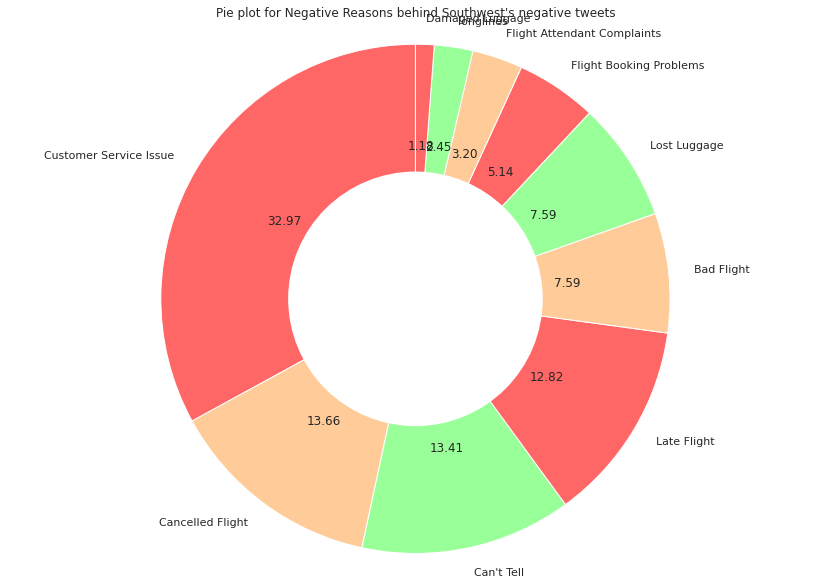

In [ ]:
negativereason_donut(southwest, 'Southwest')

Southwest broke the mold: Cancelled flights were their second most cited reason behind negative tweets. They had far more (14%) than average (9%).

### JetBlue Sentiment

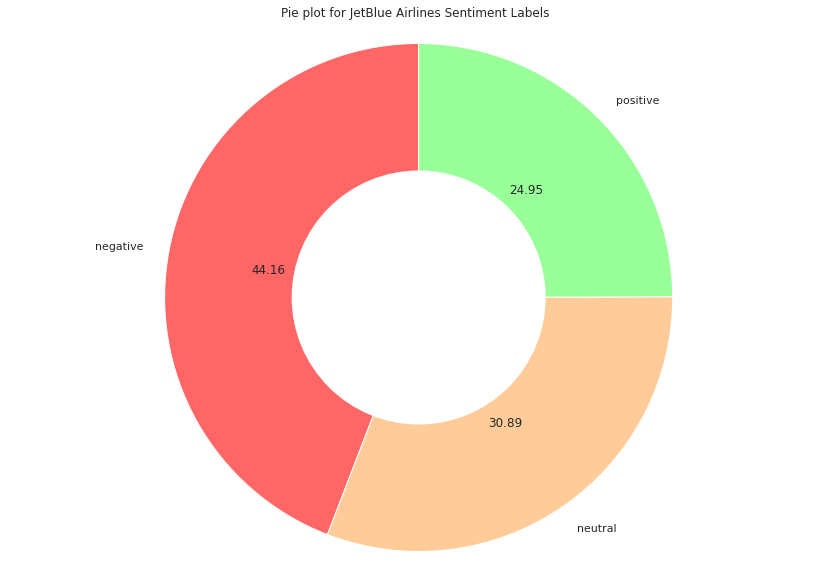

In [ ]:
sentiment_donut(jetblue, 'JetBlue Airlines')

Although JetBlue had overall many fewer negative tweets than average (43% vs. the average of 63%), this difference is not explained by excess positive tweets as the ratio between positive tweets and neutral tweets is about the same as average (neutral is about 1.4x higher).

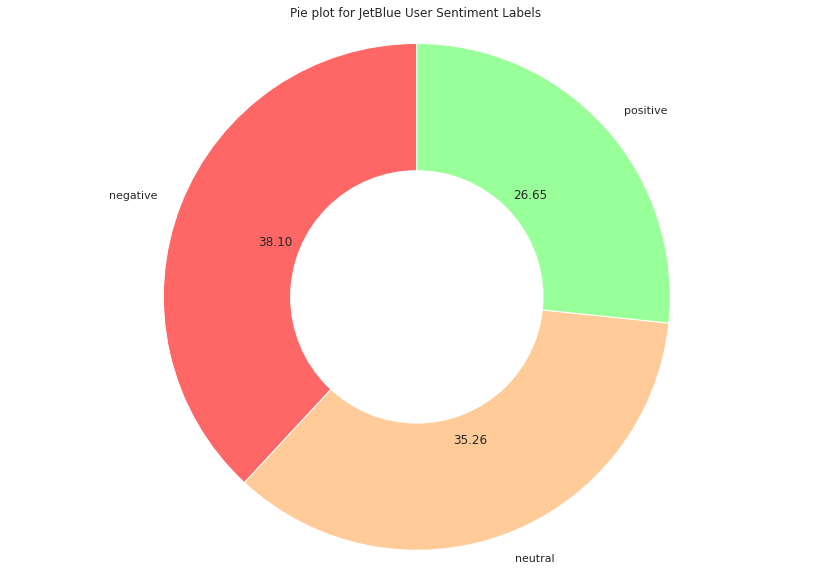

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='JetBlue'], 'JetBlue User')

JetBlue is the first airline to follow the overall trend we found: Negative users being more vocal with negative tweets. Once we control for number of tweets, we see that JetBlue has an even more positive userbase, with 27% of users positive and 35% neutral. 

Only 38% of users were negative.

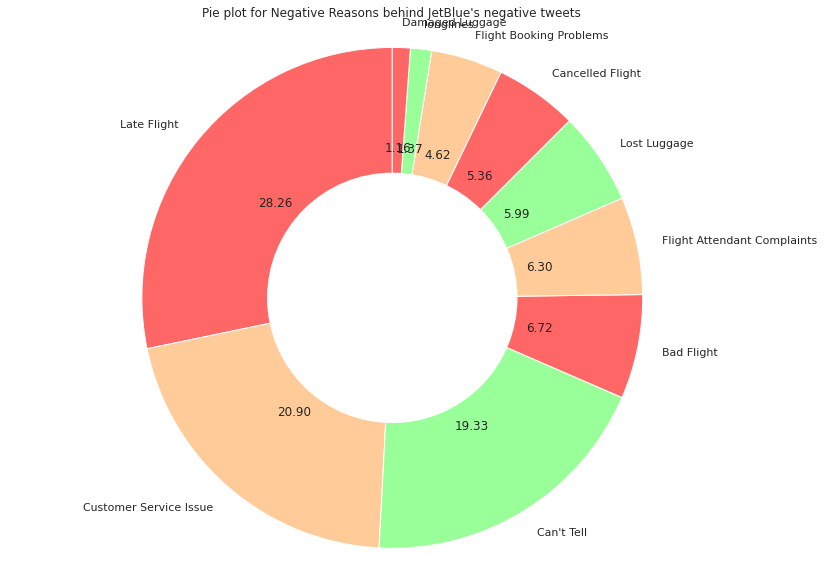

In [ ]:
negativereason_donut(jetblue, 'JetBlue')

Late flights were JetBlue's primary problem, though overall complaints about JetBlue were more evenly spread. Still, it's quite notable that customer service was complained about in only 21% of negative tweets compared to the average of 32%.

### Virgin America Sentiment

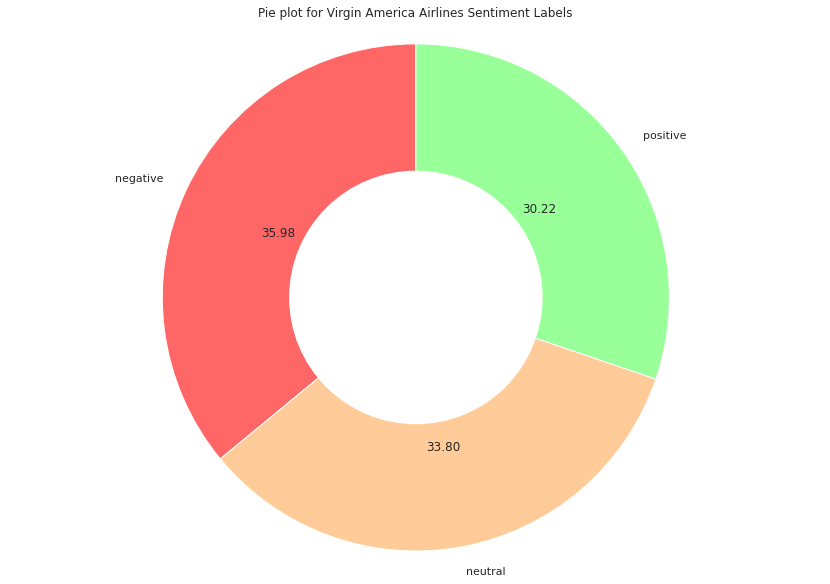

In [ ]:
sentiment_donut(virginamerica, 'Virgin America Airlines')

Virgin America is the winner for fewest angry tweets, with only 36% of tweets being negative compared to the average of 63%. In addition, positive tweets took a proportionally larger piece of the pie: neutral tweets are only about 1.1x as numerous as positive, compared to the more common 1.4x ratio.

Vocal Twitter seems to like Virgin America the most.

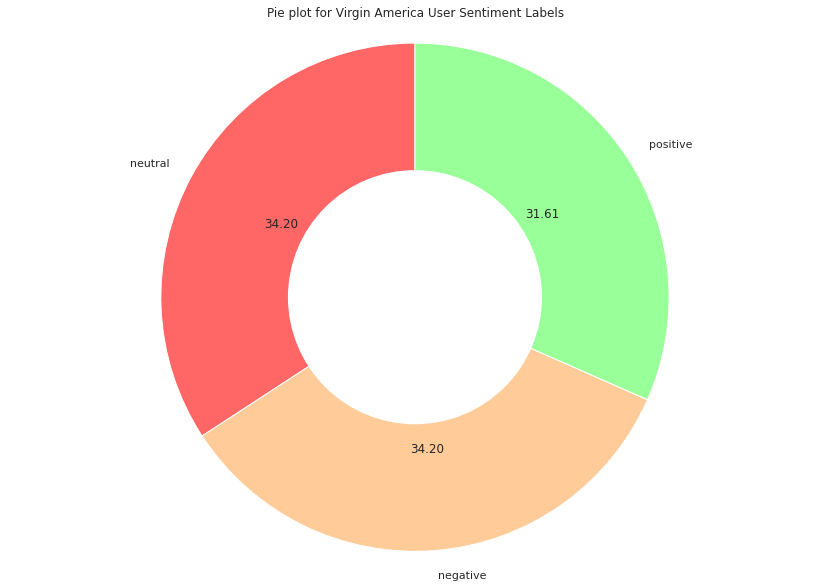

In [ ]:
sentiment_donut(tweet_frequency[tweet_frequency['airline']=='Virgin America'], 'Virgin America User')

For some reason the donut chart here changed colors. Note that negative is tan in this one.

Not that it matters, as negative and neutral have equivalent percentages, which is quite impressive. Although positivity is still the minority, compared to the other airlines Virgin America seems to be doing the best among vocal Twitter. 

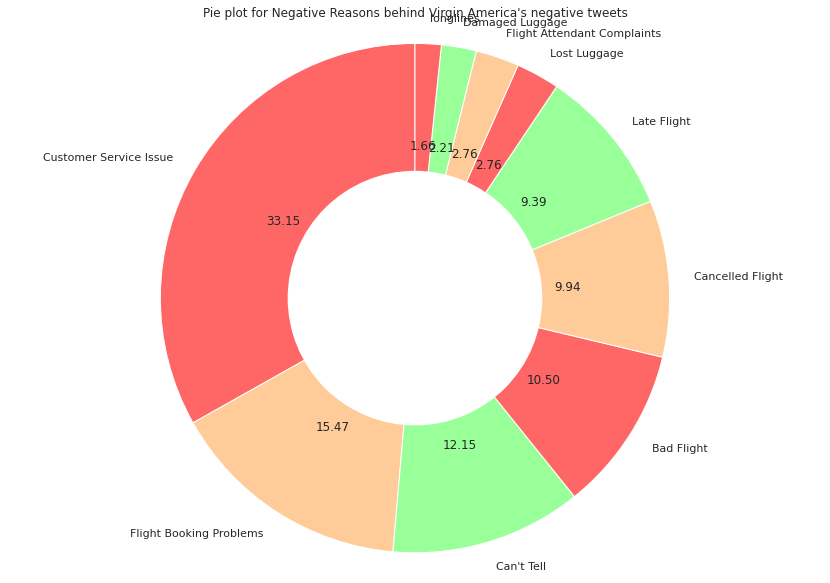

In [ ]:
negativereason_donut(virginamerica, 'Virgin America')

Although Customer Service Issues became the standout issue for Virgin America, It's noteworthy that flight booking problems leaped from the average of 6% overall to 15% of all reasons for Virgin America. This means they may have an issue with their flight booking system.

Further, bad flights usually only made up about 6% of the negative tweets, but they made up 11% for Virgin America, implying their in-flight experience could perhaps do better.

## The Gold Features

Two of the columns seem related to our primary columns, but have _gold tacked on the end. What does this mean, and how do these values compare to each other?

I'm going to pull them up and look at them closer to see if I can gather any useful information from them at all, especially given so few of them exist. Almost all of these features are null values.

### Gold Sentiment

In [ ]:
# Let's look at what the gold sentiment is
df[df['airline_sentiment_gold'].isnull() == False].head(5)

airline_sentiment  ...                                    text_normalized
1285          negative  ...  unite aware flight detail thank three hours la...
2016          negative  ...  unite light delay hours pm arrival vegas serio...
2134           neutral  ...                                     unite question
2200          negative  ...  unite hoursat point let people plane foxnews c...
2382          negative  ...           unite not page ohead best call hold mins

[5 rows x 14 columns]

It seems like a repeat of the airline sentiment. Are they ever different?

In [ ]:
print(len(df[(df['airline_sentiment_gold'].isnull() == False)]))
print(len(df[(df['airline_sentiment_gold'] == df['airline_sentiment']) == True]))

38
38


The above cell is the number of times there are non-null values for airline_sentiment_gold followed by the number of times the value of airline_sentiment_gold is identical to the airline_sentiment column.

The numbers are the same, meaning there is no contradiction and the information is repeated.

I suspect this is just the "gold members" of an airline who tweeted an opinion. There are only 40 of these tweets, but we can still talk about it later.

Now let's look at the other gold feature.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14573 non-null  object 
 1   airline_sentiment_confidence  14573 non-null  float64
 2   negativereason                9175 non-null   object 
 3   negativereason_confidence     10514 non-null  float64
 4   airline                       14573 non-null  object 
 5   airline_sentiment_gold        38 non-null     object 
 6   name                          14573 non-null  object 
 7   negativereason_gold           30 non-null     object 
 8   retweet_count                 14573 non-null  int64  
 9   text                          14573 non-null  object 
 10  tweet_created                 14573 non-null  object 
 11  word_count                    14573 non-null  int64  
 12  at_list                       14573 non-null  object 
 13  t

### Gold Negative Reason

In [ ]:
# Let's look at what the gold reasons are
df[df['negativereason_gold'].isnull() == False].head(5)

airline_sentiment  ...                                    text_normalized
1285          negative  ...  unite aware flight detail thank three hours la...
2016          negative  ...  unite light delay hours pm arrival vegas serio...
2200          negative  ...  unite hoursat point let people plane foxnews c...
2382          negative  ...           unite not page ohead best call hold mins
3004          negative  ...  unite could not possibly mess trip anymore tha...

[5 rows x 14 columns]

First sanity check: All the negative reasons are sentiment: negative. Good.

The gold reasons seem to be similar to negativereason, but there is more detail. For example, for index 1286 the negative reason is "late flight" but the gold reason includes "flight attendant complaints".

There are so few values here I bet I can look at the unique values as a list.

In [ ]:
# Calling all unique values for gold reasons
df['negativereason_gold'].value_counts()

Customer Service Issue                      11
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Name: negativereason_gold, dtype: int64

In [ ]:
# Let's compare that to non-gold
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1188
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       177
Damaged Luggage                  74
Name: negativereason, dtype: int64

To me, this shows evidence that these opinions should have been one-hotted. The categories listed for negativereason are non-exclusive, meaning that "lost luggage" and "flight attendant complaints" can both be true at the same time, and yet the data is not formatted to support this.

It could be argued that this dataset was specially curated to only include tweets that mention one and only one reason, but this hypothesis is proven wrong by the gold reasons because they *do* include multiple reasons.

Not having access to the un-curated data, all I can do is point out that this is an issue with the data and that all of the non-exclusive negative reasons may be undercounted.

 ## The Tweets

One thing I do not want is for the models to learn how to predict a negative vs. positive tweet based on who it was tweeted at. If JetBlue becomes a predictor for positivity, it would hurt JetBlue in identifying tweets that really are negative about JetBlue.

The only reasonable thing to do is to remove the names of all of the airlines from the tweets.

In [ ]:
# Make a list to fill in with the newly edited tweets
no_airline_names = []
# A list of the preprocessed airline names
removal_list = ['virginamerica','unite','southwestair','jetblue','airways','americana']

# Remove all of the preprocessed airline names from the tweets
for tweet in df['text_normalized']:
  edit_string_as_list = tweet.split()
  final_list = [word for word in edit_string_as_list if word not in removal_list]
  final_string = ' '.join(final_list)
  no_airline_names.append(final_string)

In [ ]:
# Make a new column with these new noname tweets
df['text_nonames'] = no_airline_names

Now that that is done, I'd like to see a sample tweet be turned into a vector.

In [ ]:
# Printing the tweet we'll vectorize
sample_sentence = df['text'][1]
print(sample_sentence)

@VirginAmerica plus you've added commercials to the experience... tacky.


In [ ]:
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(df['text'])
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform([sample_sentence])
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'virginamerica': 14186, 'what': 14458, 'dhepburn': 4781, 'said': 11576, 'plus': 10374, 'you': 14844, 've': 14107, 'added': 1957, 'commercials': 4009, 'to': 13246, 'the': 13040, 'experience': 5633, 'tacky': 12846, 'didn': 4798, 'today': 13250, 'must': 9180, 'mean': 8784, 'need': 9320, 'take': 12862, 'another': 2321, 'trip': 13428, 'it': 7640, 'really': 10954, 'aggressive': 2046, 'blast': 3057, 'obnoxious': 9667, 'entertainment': 5423, 'in': 7338, 'your': 14853, 'guests': 6694, 'faces': 5708, 'amp': 2255, 'they': 13087, 'have': 6828, 'little': 8344, 'recourse': 11011, 'and': 2271, 'big': 2994, 'bad': 2734, 'thing': 13096, 'about': 1855, 'seriously': 11843, 'would': 14682, 'pay': 10111, '30': 759, 'flight': 5970, 'for': 6123, 'seats': 11761, 'that': 13035, 'this': 13108, 'playing': 10339, 'only': 9775, 'flying': 6067, 'va': 14059, 'yes': 14824, 'nearly': 9316, 'every': 5540, 'time': 13190, 'fly': 6052, 'vx': 14254, 'ear': 5207, 'worm': 14655, 'won': 14619, 'go': 6521, 'away': 2655, 'miss

The huge number of zeroes is normal. We did not put a limit on max features and so every unique word in the corpus became effectively a one-hot feature. This could end up making the model overfit if we were using neural networks. We'll use randomforest instead as decision trees are largely resistant to such things.

We can't just take a simple peek with a TF-IDF vectorizer, as the entire corpus must be taken into account to calculate the IDF score.

# sklearn and nltk sentiment analysis

The goal of the models will be to predict whether an incoming tweet about an airline is positive, negative, or neutral.

We're going to use the tweets that had the name of the airline removed because we don't want the model to learn which airline is more likely to get positive/negative comments.

To this end our score of choice will be f1. We have a bias sample, a large chunk of tweets are negative, so accuracy alone would be deceiving. If we calculate a weighted f1 score then it will give us a better idea of how the models function across classes. Otherwise, we could get a very high accuracy just by getting really good at negative tweets simply because there's a lot of them.

That said accuracy is still useful, we should just consider weighted f1 as well to see if the model is learning each of the classes.

## Barebones model

The preprocessing of the data will greatly impact the score.

To show this, I'll run the models on the unprocessed text. The only processing I'll do is tokenization, which is required for vectorization.

In [ ]:
#Getting ready for the train/test split
X = df['text'] #The unprocessed tweets
y = df['airline_sentiment']
X.shape, y.shape

((14573,), (14573,))

Both X and y are the same shape, that's good. That's what we should see.

Label encoding should work for us here as our labels are technically hierarchical in nature. Positive is more positive than neutral which is, in turn, more positive than negative.

We just need to ensure our labels are assigned correctly

In [ ]:
#Checking out the order of pos, neu, and negative
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14568    positive
14569    negative
14570     neutral
14571    negative
14572     neutral
Name: airline_sentiment, Length: 14573, dtype: object

In [ ]:
# First changing y to a category
y = y.astype('category')

# Now assigning numbers to each category
y = y.cat.codes
y

0        1
1        2
2        1
3        0
4        0
        ..
14568    2
14569    0
14570    1
14571    0
14572    1
Length: 14573, dtype: int8

If we compare the order to the first instance of y, we see that now positive = 2, neutral = 1, and negative = 0, which is ideal.

In [ ]:
# We'll use the default settings for CountVectorizer for now. The preprocessing was already done anyway.
vectorizer = CountVectorizer( analyzer='word', binary=False, decode_error='strict',
                              encoding='utf-8', input='content',
                              lowercase=True, max_df=1.0, max_features=None, min_df=1,
                              ngram_range=(1, 1), preprocessor=None, stop_words=None,
                              strip_accents=None,
                              tokenizer=None, vocabulary=None) 
X = vectorizer.fit_transform(X)
X = X.toarray()

In [ ]:
# Train test split for predicting new tweets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10201, 14946), (10201,), (4372, 14946), (4372,))

We can see from the shapes that the split worked.

The second value for X_train and X_test are the number of features. This is the size of our vocabulary. I didn't put a max on it, so this represents all of the unique words found in the corpus.

In [ ]:
# Creating a Random Forest classifier
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

# Fitting to the split data
forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7114505160744262


That score is accuracy, and it's not terribly good. I just wanted a comparison between unprocessed and preprocessed tweets.

We'll keep this score in mind as we go on.

## CountVectorizer Model

The countvectorizer model turns the text into a bag of words where each word is counted and context is not taken into account (unless n-grams are used).

We'll see about using this and try a few hyperparameters before trying other methods.

The model should be able to predict the sentiment of a new tweet as it comes in.

To do this analysis, we'll have to drop every column except the text and the labels and do a train/test split. It's actually easier if we just make X and y the respective columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14573 non-null  object 
 1   airline_sentiment_confidence  14573 non-null  float64
 2   negativereason                9175 non-null   object 
 3   negativereason_confidence     10514 non-null  float64
 4   airline                       14573 non-null  object 
 5   airline_sentiment_gold        38 non-null     object 
 6   name                          14573 non-null  object 
 7   negativereason_gold           30 non-null     object 
 8   retweet_count                 14573 non-null  int64  
 9   text                          14573 non-null  object 
 10  tweet_created                 14573 non-null  object 
 11  word_count                    14573 non-null  int64  
 12  at_list                       14573 non-null  object 
 13  t

In [ ]:
#Getting ready for the train/test split
X = df['text_nonames']
y = df['airline_sentiment']
X.shape, y.shape

((14573,), (14573,))

Both X and y are the same shape, that's good. That's what we should see.

Once again we should convert and check our labels.

In [ ]:
#Checking out the order of pos, neu, and negative
y

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14568    positive
14569    negative
14570     neutral
14571    negative
14572     neutral
Name: airline_sentiment, Length: 14573, dtype: object

In [ ]:
# First changing y to a category
y = y.astype('category')

# Now assigning numbers to each category
y = y.cat.codes
y

0        1
1        2
2        1
3        0
4        0
        ..
14568    2
14569    0
14570    1
14571    0
14572    1
Length: 14573, dtype: int8

If we compare the order to the first instance of y, we see that now positive = 2, neutral = 1, and negative = 0, which is correct.

In [ ]:
# We'll use the default settings for CountVectorizer for now. The preprocessing was already done anyway.
vectorizer = CountVectorizer( analyzer='word', binary=False, decode_error='strict',
                              encoding='utf-8', input='content',
                              lowercase=True, max_df=1.0, max_features=None, min_df=1,
                              ngram_range=(1, 1), preprocessor=None, stop_words=None,
                              strip_accents=None,
                              tokenizer=None, vocabulary=None) 
X = vectorizer.fit_transform(X)
X = X.toarray()

In [ ]:
# I want to see one of these matrices
X[4462]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

That's a lot of zeroes. It is also what we should expect: if a word present in the corpus is not present in the tweet then it will appear as a 0.

In [ ]:
# Train test split for predicting new tweets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10201, 10942), (10201,), (4372, 10942), (4372,))

We can see from the shapes that the split worked.

The second value for X_train and X_test are the number of features. This is the size of our vocabulary. I didn't put a max on it, so this represents all of the unique words found in the corpus.

In [ ]:
# Creating a Random Forest classifier
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

# Fitting to the split data
forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7432241400250246


That is a pretty good start. Just preprocessing the data added a good chunk to the score. Let's try some hypertuning to push it further.

### Hypertuning the randomforest classifier

We don't need to go too crazy on hypertuning. Mainly I just want to see how many estimators we need.

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

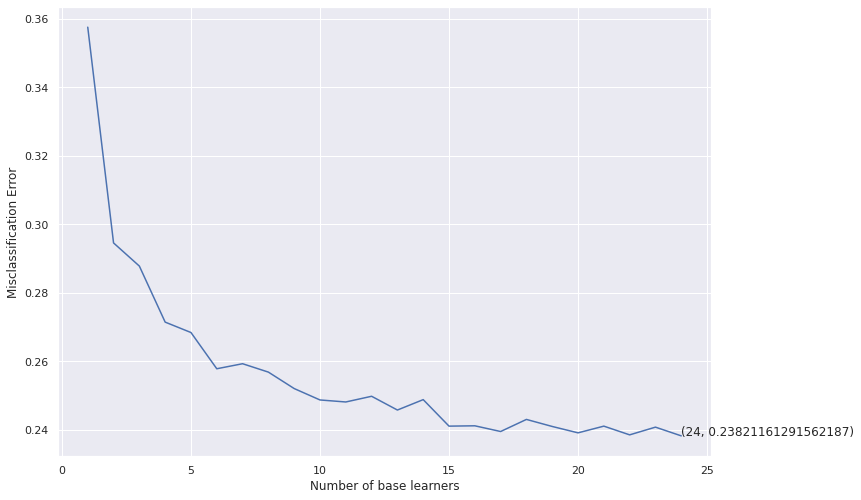

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

It seems like 24 estimators is best.

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7676120768526989

[[2512  194   68]
 [ 388  451   89]
 [ 172  105  393]]
F1 Weighted: 0.758107948582006
Accuracy: 0.7676120768526989


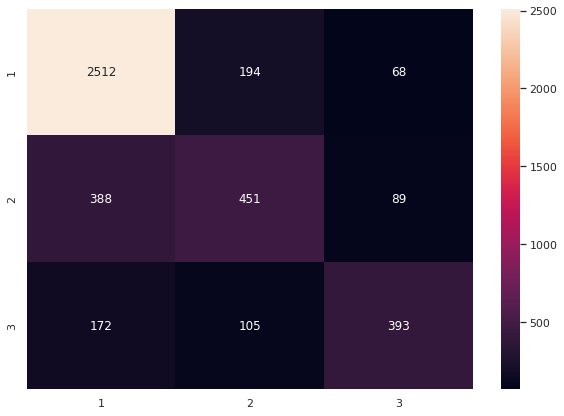

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print('F1 Weighted:', metrics.f1_score(y_test, result,average='weighted'))
print('Accuracy:', metrics.accuracy_score(y_test, result))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

It seems like the model is doing more or less the same across classes. The weighted f1 score (0.75) accounts for imbalanced classes and it is almost identical to accuracy (0.76). Eyeballing the confusion matrix confirms this.

Now I want to look at which words specifically were most important in making accurate predictions.

In [ ]:
all_features = vectorizer.get_feature_names()     #Instantiate the feature from the vectorizer
Top_features=''                                   #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]               #Getting the index numbers of our values so we can pair them to feature names
# Getting the names of the top features in order of importance.
for i in features[0:41]:
    Top_features+=all_features[i]
    Top_features+=' '
    

In [ ]:
# Making a dataframe of important words to display
important_words = pd.DataFrame(vectorizer.get_feature_names(), columns=['Word'])
important_words['Importance'] = feat

In [ ]:
# Displaying the 40 most important features, ie words.
important_words.sort_values(by=['Importance'], ascending=False)[0:41]

Word  Importance
9703      thank    0.055818
6023        not    0.030504
5951         no    0.011294
3746      great    0.010937
3248     flight    0.009046
2214      delay    0.008910
4026       hold    0.007180
4152       http    0.006559
10487      wait    0.005744
722         bag    0.005702
3599        get    0.005281
4121      hours    0.005262
2036   customer    0.005237
5169       love    0.005087
671     awesome    0.004819
1274     cancel    0.004364
1245       call    0.004036
2499         dm    0.004014
9839       time    0.003910
313       amaze    0.003857
4114       hour    0.003790
874        best    0.003735
3240      fleet    0.003711
10049       try    0.003686
7747    service    0.003550
5868      never    0.003460
5024      light    0.003396
3687       good    0.003356
6647      plane    0.003317
7908        sit    0.003183
3309        fly    0.003153
3944       help    0.003103
6671     please    0.003101
9811        thx    0.003081
6583      phone    0.003070
10784     worst    0.003004
3665         go    0.002998
4145        hrs    0.002953
5141       lose    0.002944
9652       tell    0.002931
5264       make    0.002896

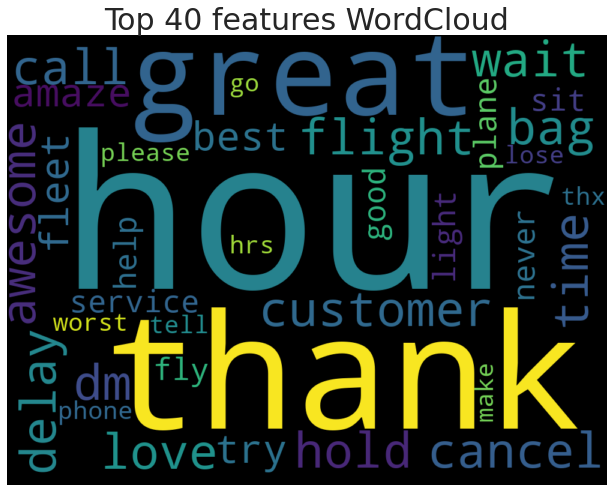

In [ ]:
# Make a wordcloud to make it more fun to visualize
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

## TF-IDF Vectorizer model

TF-IDF is similar to countvector but it adds a balance of how often a word is mentioned elsewhere in the document.

In [ ]:
#Getting ready for the train/test split
X = df['text_nonames']
y = df['airline_sentiment']
X.shape, y.shape

((14573,), (14573,))

Both are the same length, which is good. I'm going to treat it the same as countvector above.

In [ ]:
# First changing y to a category
y = y.astype('category')

# Now assigning numbers to each category
y = y.cat.codes

In [ ]:
# Initializing the vectorizer. I've displayed all of the hyperparameters for convenience. Most of them are default.
tfidvec = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                          dtype=np.float64, encoding='utf-8',
                          input='content', lowercase=True, max_df=1.0, max_features=None,
                          min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                          smooth_idf=True, stop_words=None, strip_accents=None,
                          sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                          tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# Fitting the data to the tf-idf vectorizer
X = tfidvec.fit_transform(X)
X = X.toarray()

In [ ]:
X[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Note the difference here. First, all the entries are floats. TF-IDF outputs floats as opposed to CountVector's Integers.

Also, it's not a count of frequency of the word, rather if it is not 0 it is the IDF value of the word. This takes into account the frequency of the term in the corpus, not just the document in question.

In [ ]:
# Splitting to test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# We're going to use a random forest again.
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7496061716607941


.75 is good but it hasn't surpassed the tuned CountVector. We'll see if hypertuning can improve it further. Again we'll be looking at number of estimators.

### Hypertuning the randomforest classifier

In [239]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

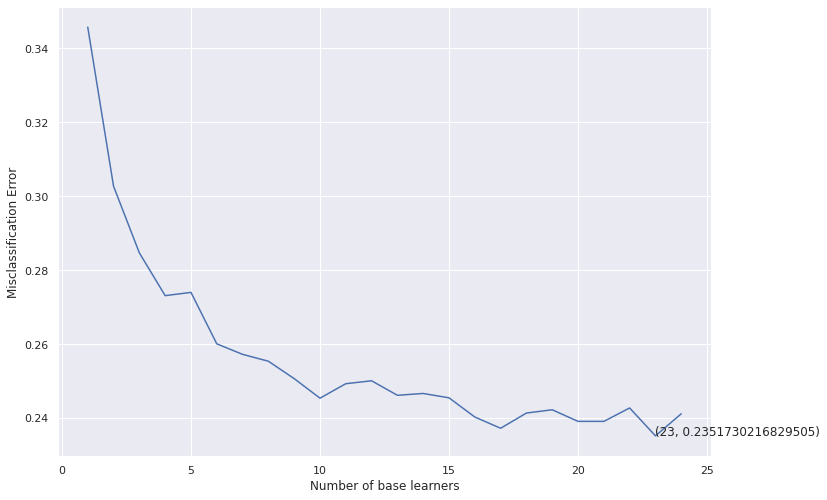

In [240]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [241]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7657822506861848

The optimal number of estimators is 23. Let's plot out the confusion matrix.

[[2573  150   51]
 [ 433  418   77]
 [ 215   98  357]]
F1 Weighted: 0.750695011168391
Accuracy: 0.7657822506861848


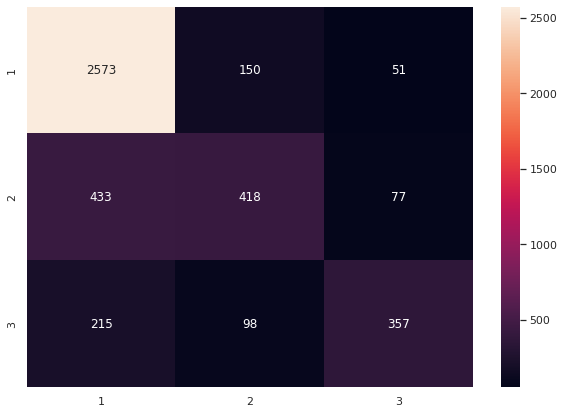

In [242]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print('F1 Weighted:', metrics.f1_score(y_test, result,average='weighted'))
print('Accuracy:', metrics.accuracy_score(y_test, result))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Despite the difference in calculations, both CountVector and TF-IDF have basically the same performance. Once again the errors are fairly evenly distributed across the classes, as is evidenced by the weighted f1.

Let's print out the top 40 words.

In [243]:
all_features = tfidvec.get_feature_names()     #Instantiate the feature from the vectorizer
Top_features=''                                   #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]               #Getting the index numbers of our values so we can pair them to feature names
# Getting the names of the top features in order of importance.
for i in features[0:41]:
    Top_features+=all_features[i]
    Top_features+=' '
    

In [244]:
# Make them into a dataframe so we can display it
important_words = pd.DataFrame(tfidvec.get_feature_names(), columns=['Word'])
important_words['Importance'] = feat

In [245]:
important_words.sort_values(by=['Importance'], ascending=False)[0:41]

Word  Importance
9703        thank    0.056705
6023          not    0.027991
5951           no    0.012617
3248       flight    0.011038
3746        great    0.010894
4152         http    0.009500
2214        delay    0.009314
5169         love    0.007957
3599          get    0.007541
4121        hours    0.007081
4026         hold    0.006627
1274       cancel    0.006498
722           bag    0.006106
874          best    0.005898
1245         call    0.005618
2499           dm    0.005176
10487        wait    0.005044
3687         good    0.004760
3309          fly    0.004649
671       awesome    0.004530
2036     customer    0.004414
7747      service    0.004385
9839         time    0.004251
313         amaze    0.004182
6671       please    0.004178
479    appreciate    0.004107
3944         help    0.004089
10806       would    0.004050
5728         much    0.003989
3665           go    0.003920
4114         hour    0.003909
5024        light    0.003847
5833         need    0.003772
3357       follow    0.003738
5868        never    0.003658
8232        still    0.003625
5264         make    0.003422
6647        plane    0.003367
7722         send    0.003311
10049         try    0.003246
7605          say    0.003104

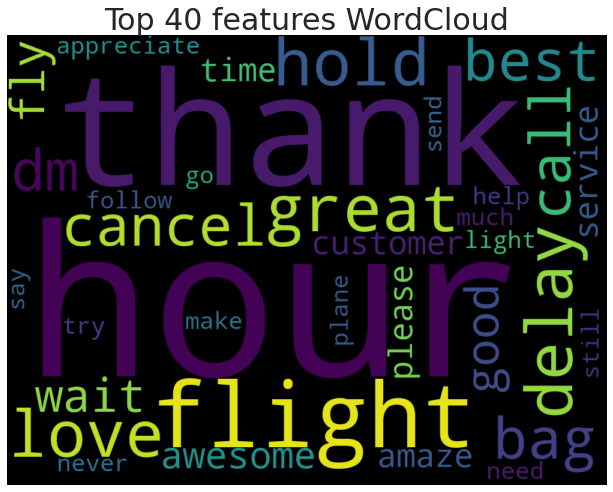

In [246]:
# Make a wordcloud to make it more fun to visualize
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)
                          
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

The word cloud for the tf-idf model is almost identical, which makes sense really.

# Conclusion

## The EDA

The EDA for this project was involved and difficult, but worth doing. We identified a great deal of problems with the data, and when it comes to building models the quality of data is paramount.

For example, if we had not deep dived into the location data we may feel that it was trustworthy and drawn conclusions from it. Instead, we discovered it was so full of contradictory errors that it was better to wholly discard all of them than to draw conclusions using the data.

Looking at the gold data revealed that the processing of the data prior to us receiving it may have introduced some serious problems: There exist tweets that complained about multiple issues at once, and yet they were only categorized as a single reason. Which reason was kept, and why? How many times did this happen?

There was still much to be gained by looking into the negative reasons behind complaints, but knowing about such problems in the data gives us an area where we can improve and also helps guard us against overgeneralizing the findings.

Furthermore, Twitter as a datasource already suffers greatly from putting too much attention on extremely vocal people. Thus, cutting down on this as much as possible before drawing any conclusions about what problems the airlines are facing is important. We saw small but significant differences between the proportions of tweet sentiment and user sentiment, and this varied by airline as well. JetBlue in particular seems to be able to get happy people to talk, for instance.

## Preprocessing

To no one's surprise, the tweets were extremely rough. People are fat-fingering their ways to broken grammar and typos.

Removing gibberish, links, and correcting mispelled words was essential to getting a reasonable outcome. We also know that it is common on Twitter to extend words, such as "soooooo" versus "so". Thus, a preprocessing step to correct these was warranted.

Finally, for this particular problem it was important to remove the airline names from the tweets. Each tweet was collected by searching for @{airline name}, and so every single tweet had an airline name in it. If one particular airline was popular, its name would be learned by the model as predicting positivity. This would be disasterous if the model went into production for that airline because it would over-predict positive tweets.

We saw this: Before this preprocessing step was performed, the wordclouds were completely dominated by airline Twitter handles.

The difficulty with preprocessing was chaining them together properly. If the order was incorrect then it would yield errors. For example, removing stopwords requires the text to already be tokenized, and if it preceded tokenization it would have errored. A bit of fiddling solved this issue.

## Vectorization

The main difference between bag of words and TF-IDF is that TF-IDF takes context more into account by adding a document-frequency term into the equation.

For this particular problem it did very little, if anything. The feature importance list was almost identical and the F1 score was the same. I think any difference between these two is more likely due to random chance than an actual performance difference.

## Model Performance

The model's performance was fairly good considering the messy nature of the data. Getting a weighted F1 score of .75 is not particularly bad though there are many improvements we could try.

Mostly it highlights the importance of preprocessing the text. A .04 gain in performance is not insignificant when we're looking at thousands of tweets.

If I had more time to work on this problem, I would try more types of models besides a random tree, and run a grid search to hypertune the winner. I'd also want to apply dimensionality reduction techniques, such as chi-squared or PCA.

## Business Insight

Once again it is worth mentioning that generalizing from Twitter alone is fraught with danger as it almost guarantees a false generalization. Twitter simply does not represent the airline customerbase.

However, once combined with other sources of information it could become a valuable puzzle piece.

For what its worth, vocal twitter users most frequently complained about customer service for most of the airlines, and customer service ranked highly for each airline. It was never a small proportion of the complaints.

If that trend continues through other demographics, how to improve customer service may be an important focus for increasing customer loyalty.

I should also note that canceled flights often became an issue complained about. Considering the relative rarity of this event, it may be a safe guess to say that any canceled flight will garner some amount of negative publicity.

